In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [286]:
# SMAPE Calculator (competition-metric taken from geeksforgeeks)
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)
  
    return 'SMAPE',round(
            np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2))*100, 4), False

In [3]:
from dateutil.easter import easter
from datetime import datetime, date, timedelta
import holidays
from holidays import CountryHoliday

In [4]:
train_data_ori = pd.read_csv('train.csv')
train_data_ori

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [5]:
test_data_ori = pd.read_csv('test.csv')
test_data_ori

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [162]:
train_eng = pd.read_csv('train_engineered.csv')
train_eng

,id,date,num_sold,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,0,2017-01-01,63,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,1,2017-01-01,66,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,2,2017-01-01,9,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,3,2017-01-01,59,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,4,2017-01-01,49,2017,1,1,5.000000e-01,1,0.5,6,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,700,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136946,136946,2021-12-31,752,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136947,136947,2021-12-31,111,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
136948,136948,2021-12-31,641,2021,4,12,-2.449294e-16,31,-0.5,4,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [163]:
test_eng = pd.read_csv('test_engineered.csv')
test_eng

,id,date,Year,Qtr,Month,Month_Sin,Day,Day_Sin,Weekday,Week_Nb,...,sin1,cos1,IYC_sin1,IYC_cos1,TTL_sin1,TTL_cos1,WMKC_sin1,WMKC_cos1,WB_sin1,WB_cos1
0,136950,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,136951,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000
2,136952,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,136953,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025,0.000000e+00,0.000000
4,136954,2022-01-01,2022,1,1,5.000000e-01,1,0.5,5,52,...,5.000000e-01,0.866025,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27371,164321,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27372,164322,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000
27373,164323,2022-12-31,2022,4,12,-2.449294e-16,31,-0.5,5,52,...,-2.449294e-16,1.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-2.449294e-16,1.000000,-0.000000e+00,0.000000


In [164]:
train_data_ori.date = pd.to_datetime(train_data_ori.date)
test_data_ori.date = pd.to_datetime(test_data_ori.date)
train_eng.date = pd.to_datetime(train_eng.date)
test_eng.date = pd.to_datetime(test_eng.date)

## Applying ensemble models

In [102]:
import catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

import optuna
np.random.seed(5)

In [228]:
train_eng2 = train_eng.loc[~train_eng.date.between(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'))].copy()
X = train_eng2.drop(['id','num_sold','date'], axis=1).astype('float')
y = np.log(train_eng2['num_sold'].values).reshape(-1,1)

In [229]:
features = X.columns.to_list()
target = 'num_sold'

In [230]:
def predict_plot(model):
    scaler = StandardScaler()
    scaler.fit(X)
    example_df = pd.concat([train_eng2, test_eng])
    example_df['num_sold'] = np.exp(model.predict(scaler.transform(example_df[features])))
    example_df = example_df.groupby(example_df['date']).mean()
    plt.figure(figsize=(20, 6))
    plt.plot(example_df.index, example_df.num_sold, label='prediction')
    ori_df = train_data_ori.copy()
    ori_df = ori_df.groupby('date').mean()
    plt.scatter(ori_df.index, ori_df.num_sold, label='true', alpha=0.5, color='red', s=3)
    plt.legend()
    plt.title('All Predictions and true num_sold for 6 years')
    plt.show()

In [231]:
def eval_model(y_val, y_hat):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_val, y_hat, s=1, color='r')
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()
    
    residuals = np.log(y_hat) - np.log(y_val)
    
    plt.figure(figsize=(18, 4))
    plt.scatter(np.arange(len(residuals)), residuals, s=1)
    plt.title('All residuals by row number')
    plt.ylabel('residual')
    plt.show()
    
    plt.figure(figsize=(18, 4))
    plt.hist(residuals, bins=200)
    plt.title('Histogram of all residuals')
    plt.show()
    print(f"Standard deviation of log residuals: {residuals.std():.3f}")
    plt.show()

In [289]:
def train_model(model, params, evaluate=False):
    scores = []
    tscv = TimeSeriesSplit(n_splits=3, test_size=27390)
    for fold, (train_idx, val_idx) in enumerate(tscv.split(train_eng2)):
        start_time = datetime.now()
        train = train_eng2.iloc[train_idx]
        val = train_eng2.iloc[val_idx]
        print('Training on these years', set(train.Year))
        print('Validating on these years', set(val.Year))  
        X_train = train[features]
        y_train = np.log(train[target])
        X_val = val[features]
        y_val = val[target]
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        if model=='cbr':
            model = CatBoostRegressor(**params, random_state=5, verbose=0,
                                      early_stopping_rounds=100,)
            model.fit(X_tr_scaled, y_train, eval_set=(X_val_scaled, np.log(y_val)))
        elif model=='xgb':
            model = XGBRegressor(**params, random_state=5, 
                                 objective='reg:squarederror',
                                 early_stopping_rounds=100,
                                 n_jobs=-1)
            model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))])
        elif model=='lgbm':
            model = LGBMRegressor(**params, random_state=5, verbose=0, 
                                  num_boost_round=100,
                                  n_jobs=-1,
                                  early_stopping_round=100,
                                  objective='regression_l1',
                                  )
            model.fit(X_tr_scaled, y_train, eval_set=[(X_val_scaled, np.log(y_val))], eval_metric=calculate_smape)
        

        y_hat = np.exp(model.predict(X_val_scaled))
    #     print(y_hat)
    #     oof.update(pd.Series(y_hat, index=X_val.index))
        _, smape_bc, _ = calculate_smape(np.array(y_val),np.array(y_hat))
        _, smape_ac, _ = calculate_smape(np.array(y_val),np.array(y_hat)/1.05)
    #     smape = calculate_smape(np.array(y_val)*1.25,np.array(y_hat))
        print(f"Fold {fold} | {str(datetime.now() - start_time)[-12:-7]}"
              f" | SMAPE BC: {smape_bc:.5f}| SMAPE AC: {smape_ac:.5f}")
    #      
        scores.append(smape_bc)
        if (fold==0)&(evaluate):
            eval_model(y_val, y_hat/1.05)
    return np.mean(scores), model

In [290]:
def run_model(model, n_trials=20):
    def objective(trial):
        # Define the hyperparameter search space
        if model=='cbr':
            params = {
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
                'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
                'depth': trial.suggest_int('depth', 4, 10),
                'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 1e2),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.5, 5)
            }
        if model=='xgb':
            params = {
                'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
                'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
                'max_depth': trial.suggest_int('max_depth', 4, 10),
                'gamma': trial.suggest_loguniform('gamma', 1e-3, 1),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10),
                'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
            }
        if model=='lgbm':
            params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=100),
            'num_leaves': trial.suggest_int('num_leaves', 10, 100),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.6, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
            'lambda': trial.suggest_loguniform('lambda', 1e-5, 10),
            'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        }
        smape, _ = train_model(model, params)
        return smape
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params
    best_score = study.best_value
    print('The best parameters are:', best_params)
    print('The best SMAPE is:', best_score)
    return best_params

## Catboost Regressor

In [243]:
best_params = run_model('cbr')

[I 2023-07-19 19:51:28,810] A new study created in memory with name: no-name-d24a262f-e919-4d5e-bd2e-73c3ac17b1b3


Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:01 | SMAPE BC: 11.18170| SMAPE AC: 10.72370
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 15.56670| SMAPE AC: 14.27900
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:51:31,107] Trial 0 finished with value: 13.7199 and parameters: {'learning_rate': 0.03289121180537099, 'n_estimators': 100, 'depth': 9, 'l2_leaf_reg': 0.004868245106143261, 'border_count': 123, 'bagging_temperature': 1.2874871017703964}. Best is trial 0 with value: 13.7199.


Fold 2 | 00:00 | SMAPE BC: 14.41130| SMAPE AC: 15.14020
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:07 | SMAPE BC: 8.91460| SMAPE AC: 7.90210
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.64080| SMAPE AC: 11.58030
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:51:39,111] Trial 1 finished with value: 11.359699999999998 and parameters: {'learning_rate': 0.028786129830573815, 'n_estimators': 300, 'depth': 10, 'l2_leaf_reg': 0.17460094499613488, 'border_count': 98, 'bagging_temperature': 2.8701879944802764}. Best is trial 1 with value: 11.359699999999998.


Fold 2 | 00:00 | SMAPE BC: 11.52370| SMAPE AC: 12.10880
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:04 | SMAPE BC: 9.34420| SMAPE AC: 8.45100
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.03310| SMAPE AC: 12.16260
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:51:44,575] Trial 2 finished with value: 11.843166666666667 and parameters: {'learning_rate': 0.026241636168299665, 'n_estimators': 200, 'depth': 10, 'l2_leaf_reg': 0.001058935669047129, 'border_count': 74, 'bagging_temperature': 1.2247937412236438}. Best is trial 1 with value: 11.359699999999998.


Fold 2 | 00:00 | SMAPE BC: 12.15220| SMAPE AC: 12.72930
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 13.83200| SMAPE AC: 13.94670
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 17.93660| SMAPE AC: 17.63110
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:51:47,511] Trial 3 finished with value: 16.462866666666667 and parameters: {'learning_rate': 0.010364785999814396, 'n_estimators': 400, 'depth': 4, 'l2_leaf_reg': 7.448327005038412, 'border_count': 176, 'bagging_temperature': 0.6722309025928924}. Best is trial 1 with value: 11.359699999999998.


Fold 2 | 00:00 | SMAPE BC: 17.62000| SMAPE AC: 18.50200
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:11 | SMAPE BC: 9.50530| SMAPE AC: 8.60630
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.01730| SMAPE AC: 12.33200
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:51:59,941] Trial 4 finished with value: 11.881900000000002 and parameters: {'learning_rate': 0.015296240976385836, 'n_estimators': 500, 'depth': 10, 'l2_leaf_reg': 39.39432214660366, 'border_count': 175, 'bagging_temperature': 0.6574139980795983}. Best is trial 1 with value: 11.359699999999998.


Fold 2 | 00:00 | SMAPE BC: 12.12310| SMAPE AC: 12.70290
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:03 | SMAPE BC: 10.54130| SMAPE AC: 9.96730
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 15.12730| SMAPE AC: 13.67230
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:04,581] Trial 5 finished with value: 13.165566666666665 and parameters: {'learning_rate': 0.012544769786236096, 'n_estimators': 300, 'depth': 9, 'l2_leaf_reg': 0.003877913613386011, 'border_count': 251, 'bagging_temperature': 0.5076963365227891}. Best is trial 1 with value: 11.359699999999998.


Fold 2 | 00:00 | SMAPE BC: 13.82810| SMAPE AC: 14.47180
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 8.50790| SMAPE AC: 7.53550
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 12.85390| SMAPE AC: 10.57420
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:07,981] Trial 6 finished with value: 10.756366666666665 and parameters: {'learning_rate': 0.11288513989932812, 'n_estimators': 400, 'depth': 6, 'l2_leaf_reg': 0.5582846039847343, 'border_count': 197, 'bagging_temperature': 1.3587835692776893}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.90730| SMAPE AC: 11.50260
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 14.43850| SMAPE AC: 14.33520
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 18.50880| SMAPE AC: 17.83580
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:10,824] Trial 7 finished with value: 16.843166666666665 and parameters: {'learning_rate': 0.01307308370363843, 'n_estimators': 200, 'depth': 8, 'l2_leaf_reg': 0.8982423062635881, 'border_count': 168, 'bagging_temperature': 0.5612702763012035}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 17.58220| SMAPE AC: 18.43280
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:06 | SMAPE BC: 8.64850| SMAPE AC: 7.65610
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.18260| SMAPE AC: 10.86770
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:17,951] Trial 8 finished with value: 10.952266666666667 and parameters: {'learning_rate': 0.10835207546705414, 'n_estimators': 500, 'depth': 9, 'l2_leaf_reg': 28.98150936715414, 'border_count': 167, 'bagging_temperature': 1.8522072124623903}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 11.02570| SMAPE AC: 11.55480
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 9.21650| SMAPE AC: 8.28480
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.65070| SMAPE AC: 11.77530
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:20,852] Trial 9 finished with value: 11.711266666666667 and parameters: {'learning_rate': 0.028569400345200977, 'n_estimators': 400, 'depth': 4, 'l2_leaf_reg': 42.457995587414665, 'border_count': 104, 'bagging_temperature': 1.2148827308662395}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 12.26660| SMAPE AC: 12.76770
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 8.45390| SMAPE AC: 7.48150
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 12.93710| SMAPE AC: 10.76450
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:24,350] Trial 10 finished with value: 10.7988 and parameters: {'learning_rate': 0.199797231202494, 'n_estimators': 400, 'depth': 6, 'l2_leaf_reg': 0.12558176576963573, 'border_count': 234, 'bagging_temperature': 4.969295832566246}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 11.00540| SMAPE AC: 11.62150
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 8.59250| SMAPE AC: 7.45240
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.02440| SMAPE AC: 10.70950
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:27,787] Trial 11 finished with value: 10.85 and parameters: {'learning_rate': 0.1568278669085389, 'n_estimators': 400, 'depth': 6, 'l2_leaf_reg': 0.12124347574176227, 'border_count': 237, 'bagging_temperature': 4.9040650696715185}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.93310| SMAPE AC: 11.57080
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 8.53920| SMAPE AC: 7.47670
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 12.91400| SMAPE AC: 10.66540
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:31,377] Trial 12 finished with value: 10.805666666666667 and parameters: {'learning_rate': 0.17620566148074235, 'n_estimators': 400, 'depth': 6, 'l2_leaf_reg': 0.9601747922389522, 'border_count': 212, 'bagging_temperature': 4.325792064834533}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.96380| SMAPE AC: 11.55230
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:03 | SMAPE BC: 8.56350| SMAPE AC: 7.49260
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.09340| SMAPE AC: 10.72660
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:35,534] Trial 13 finished with value: 10.857999999999999 and parameters: {'learning_rate': 0.09352497004740644, 'n_estimators': 500, 'depth': 6, 'l2_leaf_reg': 0.04782409444263493, 'border_count': 211, 'bagging_temperature': 2.4564420841494417}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.91710| SMAPE AC: 11.50510
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:01 | SMAPE BC: 8.75690| SMAPE AC: 7.58280
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.00300| SMAPE AC: 10.77170
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:38,131] Trial 14 finished with value: 10.9395 and parameters: {'learning_rate': 0.07223175445141775, 'n_estimators': 300, 'depth': 5, 'l2_leaf_reg': 1.5198076848722357, 'border_count': 209, 'bagging_temperature': 3.5113366915657247}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 11.05860| SMAPE AC: 11.64510
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:03 | SMAPE BC: 8.57070| SMAPE AC: 7.52590
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.83610| SMAPE AC: 11.25610
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:42,015] Trial 15 finished with value: 11.121666666666668 and parameters: {'learning_rate': 0.17334946782570318, 'n_estimators': 400, 'depth': 7, 'l2_leaf_reg': 0.07565161265855191, 'border_count': 225, 'bagging_temperature': 2.0279078128370176}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.95820| SMAPE AC: 11.49040
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:01 | SMAPE BC: 8.81100| SMAPE AC: 7.66710
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.29500| SMAPE AC: 10.96140
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:44,611] Trial 16 finished with value: 11.110833333333334 and parameters: {'learning_rate': 0.060136606811035005, 'n_estimators': 200, 'depth': 7, 'l2_leaf_reg': 0.024704968684193036, 'border_count': 32, 'bagging_temperature': 3.322549140000312}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 11.22650| SMAPE AC: 11.76590
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:02 | SMAPE BC: 8.66510| SMAPE AC: 7.52400
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.25270| SMAPE AC: 10.85560
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:47,587] Trial 17 finished with value: 10.946933333333334 and parameters: {'learning_rate': 0.1274842053500782, 'n_estimators': 500, 'depth': 5, 'l2_leaf_reg': 0.33115424442587615, 'border_count': 254, 'bagging_temperature': 1.607378734046318}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.92300| SMAPE AC: 11.51610
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:01 | SMAPE BC: 8.55880| SMAPE AC: 7.50700
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 12.90000| SMAPE AC: 10.60340
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:50,172] Trial 18 finished with value: 10.780033333333334 and parameters: {'learning_rate': 0.18834406171123583, 'n_estimators': 300, 'depth': 5, 'l2_leaf_reg': 3.3163697731123136, 'border_count': 192, 'bagging_temperature': 2.3392258635624876}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.88130| SMAPE AC: 11.48780
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
Fold 0 | 00:01 | SMAPE BC: 8.66840| SMAPE AC: 7.49810
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 12.99020| SMAPE AC: 10.61440
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 19:52:52,880] Trial 19 finished with value: 10.844733333333332 and parameters: {'learning_rate': 0.11988116883988684, 'n_estimators': 300, 'depth': 5, 'l2_leaf_reg': 5.874352732930208, 'border_count': 144, 'bagging_temperature': 2.324444931084673}. Best is trial 6 with value: 10.756366666666665.


Fold 2 | 00:00 | SMAPE BC: 10.87560| SMAPE AC: 11.44780
The best parameters are: {'learning_rate': 0.11288513989932812, 'n_estimators': 400, 'depth': 6, 'l2_leaf_reg': 0.5582846039847343, 'border_count': 197, 'bagging_temperature': 1.3587835692776893}
The best SMAPE is: 10.756366666666665


Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 0 | 00:04 | SMAPE BC: 9.75850| SMAPE AC: 8.29490


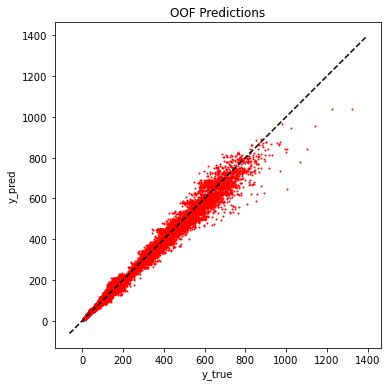

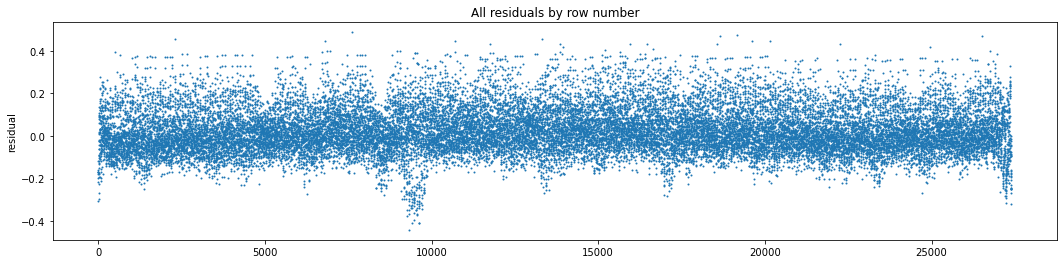

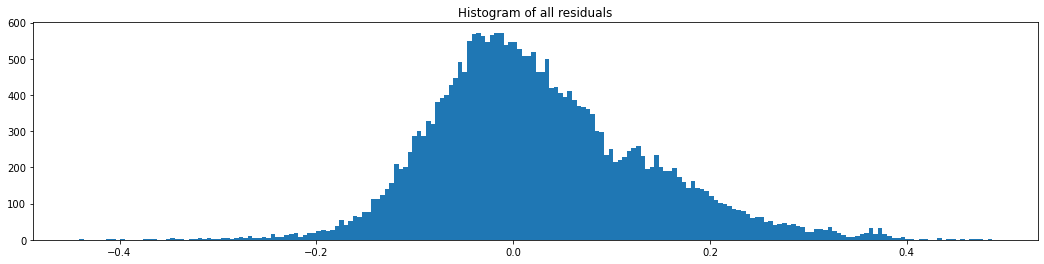

Standard deviation of log residuals: 0.107
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020}
Fold 1 | 00:00 | SMAPE BC: 17.73170| SMAPE AC: 14.99560
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}
Fold 2 | 00:00 | SMAPE BC: 10.76490| SMAPE AC: 11.47040


In [206]:
_, cb_model = train_model('cbr', best_params, True)

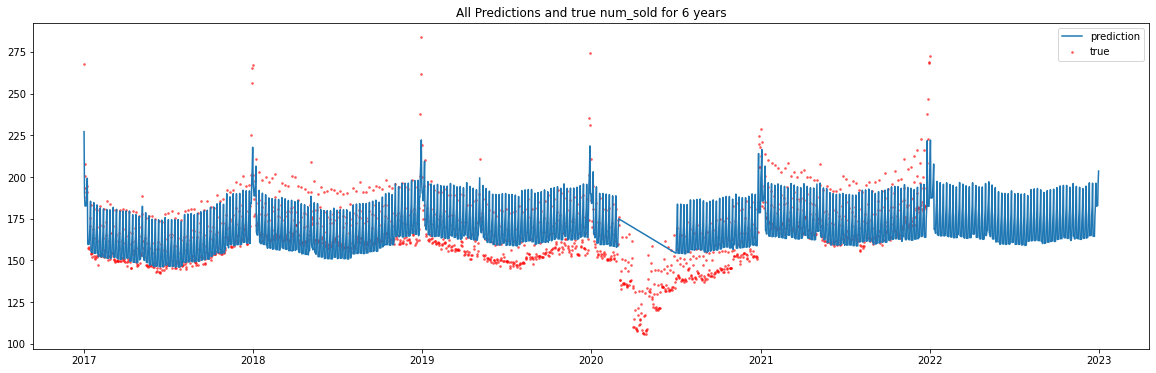

In [207]:
predict_plot(cb_model)

### Submission

In [208]:
# make predictions
y_hat = np.exp(cb_model.predict(test_eng[features]))
y_hat

array([ 80.43821195,  86.65631731,  28.47181278, ..., 111.56564654,
       632.52034565, 546.8632229 ])

In [209]:
sub = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,80.438212
1,136951,86.656317
2,136952,28.471813
3,136953,75.498045
4,136954,66.492497
...,...,...
27370,164320,691.680161
27371,164321,707.936646
27372,164322,111.565647
27373,164323,632.520346


In [210]:
sub.to_csv('submissions/sub19.csv', index=False)

## XGBoost Regressor

In [291]:
best_params = run_model('xgb', 20)

[I 2023-07-19 20:28:20,577] A new study created in memory with name: no-name-5acc55bb-e67e-4bbd-a6cc-4ac92bdf0c71


Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.93894
[1]	validation_0-rmse:3.70025
[2]	validation_0-rmse:3.48103
[3]	validation_0-rmse:3.26984
[4]	validation_0-rmse:3.06791
[5]	validation_0-rmse:2.88356
[6]	validation_0-rmse:2.70806
[7]	validation_0-rmse:2.54895
[8]	validation_0-rmse:2.39454
[9]	validation_0-rmse:2.25319
[10]	validation_0-rmse:2.11623
[11]	validation_0-rmse:1.99250
[12]	validation_0-rmse:1.87151
[13]	validation_0-rmse:1.75828
[14]	validation_0-rmse:1.65204
[15]	validation_0-rmse:1.55698
[16]	validation_0-rmse:1.46329
[17]	validation_0-rmse:1.37539
[18]	validation_0-rmse:1.29319
[19]	validation_0-rmse:1.21807
[20]	validation_0-rmse:1.14510
[21]	validation_0-rmse:1.07672
[22]	validation_0-rmse:1.01401
[23]	validation_0-rmse:0.95639
[24]	validation_0-rmse:0.90004
[25]	validation_0-rmse:0.84705
[26]	validation_0-rmse:0.80013
[27]	validation_0-rmse:0.75623
[28]	validation_0-rmse:0.71453
[29]	validation_0-rmse:0.67536
[30]

[I 2023-07-19 20:28:23,982] Trial 0 finished with value: 13.050433333333332 and parameters: {'learning_rate': 0.06086489279461404, 'n_estimators': 100, 'max_depth': 4, 'gamma': 0.02007377500780014, 'subsample': 0.8714684194796054, 'colsample_bytree': 0.7002874458429292, 'reg_alpha': 0.23735509862205467, 'reg_lambda': 0.018115642720897513}. Best is trial 0 with value: 13.050433333333332.


Fold 2 | 00:00 | SMAPE BC: 14.35760| SMAPE AC: 15.31940
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.02363
[1]	validation_0-rmse:3.86034
[2]	validation_0-rmse:3.70427
[3]	validation_0-rmse:3.55465
[4]	validation_0-rmse:3.41102
[5]	validation_0-rmse:3.27324
[6]	validation_0-rmse:3.14032
[7]	validation_0-rmse:3.01304
[8]	validation_0-rmse:2.89122
[9]	validation_0-rmse:2.77385
[10]	validation_0-rmse:2.66157
[11]	validation_0-rmse:2.55374
[12]	validation_0-rmse:2.45019
[13]	validation_0-rmse:2.35082
[14]	validation_0-rmse:2.25544
[15]	validation_0-rmse:2.16534
[16]	validation_0-rmse:2.07798
[17]	validation_0-rmse:1.99385
[18]	validation_0-rmse:1.91318
[19]	validation_0-rmse:1.83735
[20]	validation_0-rmse:1.76243
[21]	validation_0-rmse:1.69108
[22]	validation_0-rmse:1.62216
[23]	validation_0-rmse:1.55585
[24]	validation_0-rmse:1.49212
[25]	validation_0-rmse:1.43093
[26]	validation_0-rmse:1.37290
[27]	validation_0-rmse:1.31813
[28]	valid

[256]	validation_0-rmse:0.11876
[257]	validation_0-rmse:0.11877
[258]	validation_0-rmse:0.11867
[259]	validation_0-rmse:0.11866
[260]	validation_0-rmse:0.11866
[261]	validation_0-rmse:0.11863
[262]	validation_0-rmse:0.11857
[263]	validation_0-rmse:0.11857
[264]	validation_0-rmse:0.11855
[265]	validation_0-rmse:0.11855
[266]	validation_0-rmse:0.11855
[267]	validation_0-rmse:0.11852
[268]	validation_0-rmse:0.11853
[269]	validation_0-rmse:0.11853
[270]	validation_0-rmse:0.11850
[271]	validation_0-rmse:0.11850
[272]	validation_0-rmse:0.11851
[273]	validation_0-rmse:0.11850
[274]	validation_0-rmse:0.11851
[275]	validation_0-rmse:0.11850
[276]	validation_0-rmse:0.11851
[277]	validation_0-rmse:0.11851
[278]	validation_0-rmse:0.11851
[279]	validation_0-rmse:0.11851
[280]	validation_0-rmse:0.11851
[281]	validation_0-rmse:0.11851
[282]	validation_0-rmse:0.11852
[283]	validation_0-rmse:0.11851
[284]	validation_0-rmse:0.11850
[285]	validation_0-rmse:0.11850
[286]	validation_0-rmse:0.11851
[287]	va

[I 2023-07-19 20:28:34,794] Trial 1 finished with value: 11.199599999999998 and parameters: {'learning_rate': 0.040502040360861934, 'n_estimators': 300, 'max_depth': 6, 'gamma': 0.25743693777604243, 'subsample': 0.8005600331788183, 'colsample_bytree': 0.8545303656998795, 'reg_alpha': 2.3995531411623595e-05, 'reg_lambda': 0.00013340227140275926}. Best is trial 1 with value: 11.199599999999998.


Fold 2 | 00:00 | SMAPE BC: 11.51040| SMAPE AC: 12.16530
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.96309
[1]	validation_0-rmse:3.74555
[2]	validation_0-rmse:3.54054
[3]	validation_0-rmse:3.34636
[4]	validation_0-rmse:3.16252
[5]	validation_0-rmse:2.98880
[6]	validation_0-rmse:2.82476
[7]	validation_0-rmse:2.67002
[8]	validation_0-rmse:2.52374
[9]	validation_0-rmse:2.38473
[10]	validation_0-rmse:2.25438
[11]	validation_0-rmse:2.13130
[12]	validation_0-rmse:2.01523
[13]	validation_0-rmse:1.90522
[14]	validation_0-rmse:1.79968
[15]	validation_0-rmse:1.70047
[16]	validation_0-rmse:1.60759
[17]	validation_0-rmse:1.52040
[18]	validation_0-rmse:1.43708
[19]	validation_0-rmse:1.35833
[20]	validation_0-rmse:1.28358
[21]	validation_0-rmse:1.21275
[22]	validation_0-rmse:1.14684
[23]	validation_0-rmse:1.08352
[24]	validation_0-rmse:1.02415
[25]	validation_0-rmse:0.96782
[26]	validation_0-rmse:0.91486
[27]	validation_0-rmse:0.86554
[28]	valid

[I 2023-07-19 20:28:46,598] Trial 2 finished with value: 11.000566666666666 and parameters: {'learning_rate': 0.054976220815374455, 'n_estimators': 500, 'max_depth': 10, 'gamma': 0.012919454342223542, 'subsample': 0.6165076733971788, 'colsample_bytree': 0.8598347031061355, 'reg_alpha': 0.0169222756429704, 'reg_lambda': 3.280490991054435}. Best is trial 2 with value: 11.000566666666666.


Fold 2 | 00:00 | SMAPE BC: 12.39810| SMAPE AC: 13.74380
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.13886
[1]	validation_0-rmse:4.08517
[2]	validation_0-rmse:4.03217
[3]	validation_0-rmse:3.97987
[4]	validation_0-rmse:3.92825
[5]	validation_0-rmse:3.87730
[6]	validation_0-rmse:3.82702
[7]	validation_0-rmse:3.77739
[8]	validation_0-rmse:3.72841
[9]	validation_0-rmse:3.68008
[10]	validation_0-rmse:3.63235
[11]	validation_0-rmse:3.58526
[12]	validation_0-rmse:3.53878
[13]	validation_0-rmse:3.49290
[14]	validation_0-rmse:3.44762
[15]	validation_0-rmse:3.40293
[16]	validation_0-rmse:3.35882
[17]	validation_0-rmse:3.31529
[18]	validation_0-rmse:3.27233
[19]	validation_0-rmse:3.22992
[20]	validation_0-rmse:3.18807
[21]	validation_0-rmse:3.14676
[22]	validation_0-rmse:3.10598
[23]	validation_0-rmse:3.06571
[24]	validation_0-rmse:3.02597
[25]	validation_0-rmse:2.98676
[26]	validation_0-rmse:2.94805
[27]	validation_0-rmse:2.90987
[28]	valid

[256]	validation_0-rmse:0.18727
[257]	validation_0-rmse:0.18577
[258]	validation_0-rmse:0.18426
[259]	validation_0-rmse:0.18285
[260]	validation_0-rmse:0.18132
[261]	validation_0-rmse:0.17990
[262]	validation_0-rmse:0.17840
[263]	validation_0-rmse:0.17719
[264]	validation_0-rmse:0.17568
[265]	validation_0-rmse:0.17435
[266]	validation_0-rmse:0.17310
[267]	validation_0-rmse:0.17194
[268]	validation_0-rmse:0.17064
[269]	validation_0-rmse:0.16950
[270]	validation_0-rmse:0.16845
[271]	validation_0-rmse:0.16719
[272]	validation_0-rmse:0.16606
[273]	validation_0-rmse:0.16498
[274]	validation_0-rmse:0.16391
[275]	validation_0-rmse:0.16272
[276]	validation_0-rmse:0.16165
[277]	validation_0-rmse:0.16074
[278]	validation_0-rmse:0.15986
[279]	validation_0-rmse:0.15894
[280]	validation_0-rmse:0.15794
[281]	validation_0-rmse:0.15702
[282]	validation_0-rmse:0.15601
[283]	validation_0-rmse:0.15509
[284]	validation_0-rmse:0.15422
[285]	validation_0-rmse:0.15341
[286]	validation_0-rmse:0.15256
[287]	va

[I 2023-07-19 20:29:01,285] Trial 3 finished with value: 13.867066666666666 and parameters: {'learning_rate': 0.012971328910781081, 'n_estimators': 300, 'max_depth': 9, 'gamma': 0.024819236225377864, 'subsample': 0.7327030526326338, 'colsample_bytree': 0.9770392891232415, 'reg_alpha': 4.436318717882684, 'reg_lambda': 0.001576703764097079}. Best is trial 2 with value: 11.000566666666666.


Fold 2 | 00:00 | SMAPE BC: 16.33610| SMAPE AC: 18.72870
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.05016
[1]	validation_0-rmse:3.91194
[2]	validation_0-rmse:3.77843
[3]	validation_0-rmse:3.64948
[4]	validation_0-rmse:3.52492
[5]	validation_0-rmse:3.40467
[6]	validation_0-rmse:3.28831
[7]	validation_0-rmse:3.17626
[8]	validation_0-rmse:3.06806
[9]	validation_0-rmse:2.96328
[10]	validation_0-rmse:2.86217
[11]	validation_0-rmse:2.76458
[12]	validation_0-rmse:2.67013
[13]	validation_0-rmse:2.57909
[14]	validation_0-rmse:2.49121
[15]	validation_0-rmse:2.40596
[16]	validation_0-rmse:2.32366
[17]	validation_0-rmse:2.24422
[18]	validation_0-rmse:2.16752
[19]	validation_0-rmse:2.09337
[20]	validation_0-rmse:2.02176
[21]	validation_0-rmse:1.95268
[22]	validation_0-rmse:1.88580
[23]	validation_0-rmse:1.82136
[24]	validation_0-rmse:1.75894
[25]	validation_0-rmse:1.69875
[26]	validation_0-rmse:1.64062
[27]	validation_0-rmse:1.58409
[28]	valid

[I 2023-07-19 20:29:15,004] Trial 4 finished with value: 11.288599999999997 and parameters: {'learning_rate': 0.03407932360078775, 'n_estimators': 400, 'max_depth': 10, 'gamma': 0.4140369067095394, 'subsample': 0.9219041068552116, 'colsample_bytree': 0.9897650836392513, 'reg_alpha': 0.4771687787508659, 'reg_lambda': 0.00010886260497655769}. Best is trial 2 with value: 11.000566666666666.


Fold 2 | 00:00 | SMAPE BC: 12.46970| SMAPE AC: 13.80840
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.89905
[1]	validation_0-rmse:3.62547
[2]	validation_0-rmse:3.37109
[3]	validation_0-rmse:3.13518
[4]	validation_0-rmse:2.91522
[5]	validation_0-rmse:2.71107
[6]	validation_0-rmse:2.52041
[7]	validation_0-rmse:2.34337
[8]	validation_0-rmse:2.17884
[9]	validation_0-rmse:2.02562
[10]	validation_0-rmse:1.88264
[11]	validation_0-rmse:1.74962
[12]	validation_0-rmse:1.62645
[13]	validation_0-rmse:1.51137
[14]	validation_0-rmse:1.40435
[15]	validation_0-rmse:1.30403
[16]	validation_0-rmse:1.21097
[17]	validation_0-rmse:1.12530
[18]	validation_0-rmse:1.04555
[19]	validation_0-rmse:0.97205
[20]	validation_0-rmse:0.90225
[21]	validation_0-rmse:0.83802
[22]	validation_0-rmse:0.77799
[23]	validation_0-rmse:0.72243
[24]	validation_0-rmse:0.67091
[25]	validation_0-rmse:0.62291
[26]	validation_0-rmse:0.57861
[27]	validation_0-rmse:0.53762
[28]	valid

[I 2023-07-19 20:29:23,755] Trial 5 finished with value: 11.068400000000002 and parameters: {'learning_rate': 0.07006807921569567, 'n_estimators': 300, 'max_depth': 8, 'gamma': 0.007611682936028225, 'subsample': 0.7472453724486577, 'colsample_bytree': 0.9802254130635601, 'reg_alpha': 0.319405023808471, 'reg_lambda': 1.0461093604500335e-05}. Best is trial 2 with value: 11.000566666666666.


Fold 2 | 00:00 | SMAPE BC: 12.25270| SMAPE AC: 13.64510
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.11374
[1]	validation_0-rmse:4.03570
[2]	validation_0-rmse:3.95915
[3]	validation_0-rmse:3.88410
[4]	validation_0-rmse:3.81044
[5]	validation_0-rmse:3.73815
[6]	validation_0-rmse:3.66714
[7]	validation_0-rmse:3.59758
[8]	validation_0-rmse:3.52926
[9]	validation_0-rmse:3.46233
[10]	validation_0-rmse:3.39659
[11]	validation_0-rmse:3.33218
[12]	validation_0-rmse:3.26893
[13]	validation_0-rmse:3.20688
[14]	validation_0-rmse:3.14610
[15]	validation_0-rmse:3.08637
[16]	validation_0-rmse:3.02776
[17]	validation_0-rmse:2.97016
[18]	validation_0-rmse:2.91364
[19]	validation_0-rmse:2.85840
[20]	validation_0-rmse:2.80406
[21]	validation_0-rmse:2.75069
[22]	validation_0-rmse:2.69853
[23]	validation_0-rmse:2.64722
[24]	validation_0-rmse:2.59699
[25]	validation_0-rmse:2.54766
[26]	validation_0-rmse:2.49924
[27]	validation_0-rmse:2.45170
[28]	valid

[256]	validation_0-rmse:0.11074
[257]	validation_0-rmse:0.11080
[258]	validation_0-rmse:0.11082
[259]	validation_0-rmse:0.11085
[260]	validation_0-rmse:0.11090
[261]	validation_0-rmse:0.11095
[262]	validation_0-rmse:0.11101
[263]	validation_0-rmse:0.11109
[264]	validation_0-rmse:0.11114
[265]	validation_0-rmse:0.11121
[266]	validation_0-rmse:0.11126
[267]	validation_0-rmse:0.11135
[268]	validation_0-rmse:0.11142
[269]	validation_0-rmse:0.11149
[270]	validation_0-rmse:0.11155
[271]	validation_0-rmse:0.11160
[272]	validation_0-rmse:0.11166
[273]	validation_0-rmse:0.11172
[274]	validation_0-rmse:0.11178
[275]	validation_0-rmse:0.11186
[276]	validation_0-rmse:0.11194
[277]	validation_0-rmse:0.11201
[278]	validation_0-rmse:0.11209
[279]	validation_0-rmse:0.11217
[280]	validation_0-rmse:0.11224
[281]	validation_0-rmse:0.11230
[282]	validation_0-rmse:0.11237
[283]	validation_0-rmse:0.11244
[284]	validation_0-rmse:0.11250
[285]	validation_0-rmse:0.11257
[286]	validation_0-rmse:0.11265
[287]	va

[I 2023-07-19 20:29:45,889] Trial 6 finished with value: 10.814866666666667 and parameters: {'learning_rate': 0.01897913367342614, 'n_estimators': 400, 'max_depth': 10, 'gamma': 0.024594783408140093, 'subsample': 0.7034151932536086, 'colsample_bytree': 0.9737460078857668, 'reg_alpha': 0.00021112767220087913, 'reg_lambda': 0.3474199922256086}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.21080| SMAPE AC: 13.84950
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.90299
[1]	validation_0-rmse:3.63294
[2]	validation_0-rmse:3.38530
[3]	validation_0-rmse:3.15141
[4]	validation_0-rmse:2.93211
[5]	validation_0-rmse:2.72796
[6]	validation_0-rmse:2.53746
[7]	validation_0-rmse:2.36340
[8]	validation_0-rmse:2.19921
[9]	validation_0-rmse:2.04592
[10]	validation_0-rmse:1.90312
[11]	validation_0-rmse:1.77415
[12]	validation_0-rmse:1.65082
[13]	validation_0-rmse:1.53656
[14]	validation_0-rmse:1.42963
[15]	validation_0-rmse:1.33397
[16]	validation_0-rmse:1.24261
[17]	validation_0-rmse:1.15693
[18]	validation_0-rmse:1.07727
[19]	validation_0-rmse:1.00635
[20]	validation_0-rmse:0.93757
[21]	validation_0-rmse:0.87359
[22]	validation_0-rmse:0.81433
[23]	validation_0-rmse:0.75926
[24]	validation_0-rmse:0.70742
[25]	validation_0-rmse:0.66040
[26]	validation_0-rmse:0.61659
[27]	validation_0-rmse:0.57776
[28]	valid

[256]	validation_0-rmse:0.11641
[257]	validation_0-rmse:0.11642
[258]	validation_0-rmse:0.11640
[259]	validation_0-rmse:0.11640
[260]	validation_0-rmse:0.11640
[261]	validation_0-rmse:0.11638
[262]	validation_0-rmse:0.11636
[263]	validation_0-rmse:0.11637
[264]	validation_0-rmse:0.11635
[265]	validation_0-rmse:0.11636
[266]	validation_0-rmse:0.11635
[267]	validation_0-rmse:0.11633
[268]	validation_0-rmse:0.11632
[269]	validation_0-rmse:0.11631
[270]	validation_0-rmse:0.11627
[271]	validation_0-rmse:0.11627
[272]	validation_0-rmse:0.11624
[273]	validation_0-rmse:0.11622
[274]	validation_0-rmse:0.11622
[275]	validation_0-rmse:0.11620
[276]	validation_0-rmse:0.11625
[277]	validation_0-rmse:0.11624
[278]	validation_0-rmse:0.11624
[279]	validation_0-rmse:0.11623
[280]	validation_0-rmse:0.11624
[281]	validation_0-rmse:0.11623
[282]	validation_0-rmse:0.11619
[283]	validation_0-rmse:0.11616
[284]	validation_0-rmse:0.11617
[285]	validation_0-rmse:0.11615
[286]	validation_0-rmse:0.11616
[287]	va

[I 2023-07-19 20:29:54,972] Trial 7 finished with value: 10.951500000000001 and parameters: {'learning_rate': 0.06937460257099923, 'n_estimators': 300, 'max_depth': 5, 'gamma': 0.0014637368167817334, 'subsample': 0.8166892035058505, 'colsample_bytree': 0.804349343619228, 'reg_alpha': 0.5118091788534188, 'reg_lambda': 3.0616459804679926e-05}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 11.11140| SMAPE AC: 11.76410
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.81263
[1]	validation_0-rmse:3.46563
[2]	validation_0-rmse:3.15262
[3]	validation_0-rmse:2.86645
[4]	validation_0-rmse:2.61011
[5]	validation_0-rmse:2.37113
[6]	validation_0-rmse:2.15514
[7]	validation_0-rmse:1.96378
[8]	validation_0-rmse:1.78455
[9]	validation_0-rmse:1.62514
[10]	validation_0-rmse:1.47612
[11]	validation_0-rmse:1.34292
[12]	validation_0-rmse:1.21955
[13]	validation_0-rmse:1.10762
[14]	validation_0-rmse:1.00557
[15]	validation_0-rmse:0.91484
[16]	validation_0-rmse:0.83199
[17]	validation_0-rmse:0.75707
[18]	validation_0-rmse:0.68787
[19]	validation_0-rmse:0.62663
[20]	validation_0-rmse:0.56950
[21]	validation_0-rmse:0.51837
[22]	validation_0-rmse:0.47259
[23]	validation_0-rmse:0.43129
[24]	validation_0-rmse:0.39289
[25]	validation_0-rmse:0.35868
[26]	validation_0-rmse:0.32856
[27]	validation_0-rmse:0.30170
[28]	valid

[I 2023-07-19 20:30:00,255] Trial 8 finished with value: 11.146799999999999 and parameters: {'learning_rate': 0.09111647604019579, 'n_estimators': 100, 'max_depth': 8, 'gamma': 0.04535787690507371, 'subsample': 0.6331746587725714, 'colsample_bytree': 0.6631804955013991, 'reg_alpha': 2.9274349290496816e-05, 'reg_lambda': 0.5319003491276838}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.35350| SMAPE AC: 13.54200
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.09083
[1]	validation_0-rmse:3.99089
[2]	validation_0-rmse:3.89341
[3]	validation_0-rmse:3.79826
[4]	validation_0-rmse:3.70666
[5]	validation_0-rmse:3.61578
[6]	validation_0-rmse:3.52698
[7]	validation_0-rmse:3.44220
[8]	validation_0-rmse:3.35786
[9]	validation_0-rmse:3.27791
[10]	validation_0-rmse:3.19761
[11]	validation_0-rmse:3.11984
[12]	validation_0-rmse:3.04324
[13]	validation_0-rmse:2.96860
[14]	validation_0-rmse:2.89585
[15]	validation_0-rmse:2.82645
[16]	validation_0-rmse:2.75701
[17]	validation_0-rmse:2.68955
[18]	validation_0-rmse:2.62360
[19]	validation_0-rmse:2.56021
[20]	validation_0-rmse:2.49747
[21]	validation_0-rmse:2.43638
[22]	validation_0-rmse:2.37835
[23]	validation_0-rmse:2.32151
[24]	validation_0-rmse:2.26441
[25]	validation_0-rmse:2.20898
[26]	validation_0-rmse:2.15562
[27]	validation_0-rmse:2.10346
[28]	valid

[256]	validation_0-rmse:0.11771
[257]	validation_0-rmse:0.11774
[258]	validation_0-rmse:0.11774
[259]	validation_0-rmse:0.11776
[260]	validation_0-rmse:0.11778
[261]	validation_0-rmse:0.11782
[262]	validation_0-rmse:0.11785
[263]	validation_0-rmse:0.11787
[264]	validation_0-rmse:0.11791
[265]	validation_0-rmse:0.11796
[266]	validation_0-rmse:0.11799
[267]	validation_0-rmse:0.11801
[268]	validation_0-rmse:0.11798
[269]	validation_0-rmse:0.11802
[270]	validation_0-rmse:0.11801
[271]	validation_0-rmse:0.11804
[272]	validation_0-rmse:0.11808
[273]	validation_0-rmse:0.11811
[274]	validation_0-rmse:0.11813
[275]	validation_0-rmse:0.11815
[276]	validation_0-rmse:0.11814
[277]	validation_0-rmse:0.11817
[278]	validation_0-rmse:0.11818
[279]	validation_0-rmse:0.11818
[280]	validation_0-rmse:0.11818
[281]	validation_0-rmse:0.11821
[282]	validation_0-rmse:0.11821
[283]	validation_0-rmse:0.11823
[284]	validation_0-rmse:0.11824
[285]	validation_0-rmse:0.11822
[286]	validation_0-rmse:0.11822
[287]	va

[I 2023-07-19 20:30:14,441] Trial 9 finished with value: 11.074533333333335 and parameters: {'learning_rate': 0.024366557709221068, 'n_estimators': 400, 'max_depth': 9, 'gamma': 0.11048553394244631, 'subsample': 0.8114316073807154, 'colsample_bytree': 0.6691109974317738, 'reg_alpha': 0.002230572299301119, 'reg_lambda': 0.0022319489775845733}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.59620| SMAPE AC: 14.13980
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:3.46926
[1]	validation_0-rmse:2.87041
[2]	validation_0-rmse:2.37396
[3]	validation_0-rmse:1.96292
[4]	validation_0-rmse:1.62212
[5]	validation_0-rmse:1.33774
[6]	validation_0-rmse:1.10468
[7]	validation_0-rmse:0.91198
[8]	validation_0-rmse:0.75363
[9]	validation_0-rmse:0.62137
[10]	validation_0-rmse:0.51346
[11]	validation_0-rmse:0.42610
[12]	validation_0-rmse:0.35338
[13]	validation_0-rmse:0.29614
[14]	validation_0-rmse:0.24951
[15]	validation_0-rmse:0.21228
[16]	validation_0-rmse:0.18369
[17]	validation_0-rmse:0.16225
[18]	validation_0-rmse:0.14585
[19]	validation_0-rmse:0.13543
[20]	validation_0-rmse:0.12832
[21]	validation_0-rmse:0.12387
[22]	validation_0-rmse:0.12135
[23]	validation_0-rmse:0.11902
[24]	validation_0-rmse:0.11794
[25]	validation_0-rmse:0.11773
[26]	validation_0-rmse:0.11808
[27]	validation_0-rmse:0.11801
[28]	valid

[256]	validation_0-rmse:0.11691
[257]	validation_0-rmse:0.11690
[258]	validation_0-rmse:0.11691
[259]	validation_0-rmse:0.11691
[260]	validation_0-rmse:0.11691
[261]	validation_0-rmse:0.11691
[262]	validation_0-rmse:0.11690
[263]	validation_0-rmse:0.11690
[264]	validation_0-rmse:0.11690
[265]	validation_0-rmse:0.11687
[266]	validation_0-rmse:0.11687
[267]	validation_0-rmse:0.11686
[268]	validation_0-rmse:0.11687
[269]	validation_0-rmse:0.11687
[270]	validation_0-rmse:0.11687
[271]	validation_0-rmse:0.11688
[272]	validation_0-rmse:0.11688
[273]	validation_0-rmse:0.11687
[274]	validation_0-rmse:0.11687
[275]	validation_0-rmse:0.11687
[276]	validation_0-rmse:0.11687
[277]	validation_0-rmse:0.11688
[278]	validation_0-rmse:0.11688
[279]	validation_0-rmse:0.11687
[280]	validation_0-rmse:0.11687
[281]	validation_0-rmse:0.11687
[282]	validation_0-rmse:0.11687
[283]	validation_0-rmse:0.11686
[284]	validation_0-rmse:0.11686
[285]	validation_0-rmse:0.11686
[286]	validation_0-rmse:0.11687
[287]	va

[I 2023-07-19 20:30:32,000] Trial 10 finished with value: 11.111533333333332 and parameters: {'learning_rate': 0.17262836919707247, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.10011453309386704, 'subsample': 0.9657200920386683, 'colsample_bytree': 0.908826136256626, 'reg_alpha': 0.0002896622906653154, 'reg_lambda': 0.0817315539271273}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 11.19150| SMAPE AC: 11.77830
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.12315
[1]	validation_0-rmse:4.05424
[2]	validation_0-rmse:3.98785
[3]	validation_0-rmse:3.92121
[4]	validation_0-rmse:3.85566
[5]	validation_0-rmse:3.79123
[6]	validation_0-rmse:3.72789
[7]	validation_0-rmse:3.66692
[8]	validation_0-rmse:3.60564
[9]	validation_0-rmse:3.54538
[10]	validation_0-rmse:3.48613
[11]	validation_0-rmse:3.42956
[12]	validation_0-rmse:3.37227
[13]	validation_0-rmse:3.31585
[14]	validation_0-rmse:3.26015
[15]	validation_0-rmse:3.20697
[16]	validation_0-rmse:3.15343
[17]	validation_0-rmse:3.10078
[18]	validation_0-rmse:3.04857
[19]	validation_0-rmse:2.99889
[20]	validation_0-rmse:2.94876
[21]	validation_0-rmse:2.89946
[22]	validation_0-rmse:2.85097
[23]	validation_0-rmse:2.80326
[24]	validation_0-rmse:2.75612
[25]	validation_0-rmse:2.71011
[26]	validation_0-rmse:2.66446
[27]	validation_0-rmse:2.62095
[28]	valid

[I 2023-07-19 20:30:38,562] Trial 11 finished with value: 19.0111 and parameters: {'learning_rate': 0.016773041371941223, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.0016222767484214513, 'subsample': 0.7035141804225554, 'colsample_bytree': 0.7636977040657732, 'reg_alpha': 0.00910294434880247, 'reg_lambda': 7.676042298550976}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 21.74350| SMAPE AC: 24.69010
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.09998
[1]	validation_0-rmse:4.00882
[2]	validation_0-rmse:3.92154
[3]	validation_0-rmse:3.83423
[4]	validation_0-rmse:3.75104
[5]	validation_0-rmse:3.66972
[6]	validation_0-rmse:3.58788
[7]	validation_0-rmse:3.51070
[8]	validation_0-rmse:3.43238
[9]	validation_0-rmse:3.35798
[10]	validation_0-rmse:3.28609
[11]	validation_0-rmse:3.21520
[12]	validation_0-rmse:3.14292
[13]	validation_0-rmse:3.07239
[14]	validation_0-rmse:3.00394
[15]	validation_0-rmse:2.93868
[16]	validation_0-rmse:2.87342
[17]	validation_0-rmse:2.80956
[18]	validation_0-rmse:2.74773
[19]	validation_0-rmse:2.68792
[20]	validation_0-rmse:2.62795
[21]	validation_0-rmse:2.57125
[22]	validation_0-rmse:2.51553
[23]	validation_0-rmse:2.46097
[24]	validation_0-rmse:2.40613
[25]	validation_0-rmse:2.35258
[26]	validation_0-rmse:2.30193
[27]	validation_0-rmse:2.25177
[28]	valid

[255]	validation_0-rmse:0.14628
[256]	validation_0-rmse:0.14615
[257]	validation_0-rmse:0.14604
[258]	validation_0-rmse:0.14544
[259]	validation_0-rmse:0.14531
[260]	validation_0-rmse:0.14491
[261]	validation_0-rmse:0.14437
[262]	validation_0-rmse:0.14423
[263]	validation_0-rmse:0.14394
[264]	validation_0-rmse:0.14384
[265]	validation_0-rmse:0.14371
[266]	validation_0-rmse:0.14360
[267]	validation_0-rmse:0.14347
[268]	validation_0-rmse:0.14335
[269]	validation_0-rmse:0.14308
[270]	validation_0-rmse:0.14258
[271]	validation_0-rmse:0.14248
[272]	validation_0-rmse:0.14238
[273]	validation_0-rmse:0.14226
[274]	validation_0-rmse:0.14215
[275]	validation_0-rmse:0.14203
[276]	validation_0-rmse:0.14195
[277]	validation_0-rmse:0.14153
[278]	validation_0-rmse:0.14141
[279]	validation_0-rmse:0.14130
[280]	validation_0-rmse:0.14082
[281]	validation_0-rmse:0.14058
[282]	validation_0-rmse:0.14049
[283]	validation_0-rmse:0.14049
[284]	validation_0-rmse:0.14039
[285]	validation_0-rmse:0.14013
[286]	va

[I 2023-07-19 20:30:48,352] Trial 12 finished with value: 11.971000000000002 and parameters: {'learning_rate': 0.022322963190251923, 'n_estimators': 400, 'max_depth': 4, 'gamma': 0.0018472881906837152, 'subsample': 0.852226223874486, 'colsample_bytree': 0.6081187365211509, 'reg_alpha': 0.00020516594153382223, 'reg_lambda': 0.28528119963567244}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.76440| SMAPE AC: 13.46790
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.14644
[1]	validation_0-rmse:4.10016
[2]	validation_0-rmse:4.05474
[3]	validation_0-rmse:4.00949
[4]	validation_0-rmse:3.96471
[5]	validation_0-rmse:3.92044
[6]	validation_0-rmse:3.87668
[7]	validation_0-rmse:3.83369
[8]	validation_0-rmse:3.79090
[9]	validation_0-rmse:3.74859
[10]	validation_0-rmse:3.70674
[11]	validation_0-rmse:3.66635
[12]	validation_0-rmse:3.62543
[13]	validation_0-rmse:3.58493
[14]	validation_0-rmse:3.54493
[15]	validation_0-rmse:3.50663
[16]	validation_0-rmse:3.46751
[17]	validation_0-rmse:3.42884
[18]	validation_0-rmse:3.39054
[19]	validation_0-rmse:3.35375
[20]	validation_0-rmse:3.31630
[21]	validation_0-rmse:3.27931
[22]	validation_0-rmse:3.24269
[23]	validation_0-rmse:3.20649
[24]	validation_0-rmse:3.17070
[25]	validation_0-rmse:3.13534
[26]	validation_0-rmse:3.10035
[27]	validation_0-rmse:3.06664
[28]	valid

[I 2023-07-19 20:30:56,257] Trial 13 finished with value: 41.93343333333333 and parameters: {'learning_rate': 0.011167623197696219, 'n_estimators': 200, 'max_depth': 6, 'gamma': 0.005222922891120943, 'subsample': 0.6818773625961368, 'colsample_bytree': 0.7890921257914868, 'reg_alpha': 5.5994801553104905, 'reg_lambda': 0.015534973673649524}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 45.85420| SMAPE AC: 49.97030
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.05982
[1]	validation_0-rmse:3.93055
[2]	validation_0-rmse:3.80552
[3]	validation_0-rmse:3.68477
[4]	validation_0-rmse:3.56769
[5]	validation_0-rmse:3.45425
[6]	validation_0-rmse:3.34413
[7]	validation_0-rmse:3.23780
[8]	validation_0-rmse:3.13506
[9]	validation_0-rmse:3.03531
[10]	validation_0-rmse:2.93879
[11]	validation_0-rmse:2.84522
[12]	validation_0-rmse:2.75467
[13]	validation_0-rmse:2.66715
[14]	validation_0-rmse:2.58241
[15]	validation_0-rmse:2.50037
[16]	validation_0-rmse:2.42111
[17]	validation_0-rmse:2.34410
[18]	validation_0-rmse:2.26931
[19]	validation_0-rmse:2.19862
[20]	validation_0-rmse:2.12844
[21]	validation_0-rmse:2.06079
[22]	validation_0-rmse:1.99536
[23]	validation_0-rmse:1.93160
[24]	validation_0-rmse:1.86998
[25]	validation_0-rmse:1.80990
[26]	validation_0-rmse:1.75226
[27]	validation_0-rmse:1.69652
[28]	valid

[256]	validation_0-rmse:0.11895
[257]	validation_0-rmse:0.11893
[258]	validation_0-rmse:0.11883
[259]	validation_0-rmse:0.11879
[260]	validation_0-rmse:0.11880
[261]	validation_0-rmse:0.11875
[262]	validation_0-rmse:0.11870
[263]	validation_0-rmse:0.11869
[264]	validation_0-rmse:0.11868
[265]	validation_0-rmse:0.11863
[266]	validation_0-rmse:0.11859
[267]	validation_0-rmse:0.11861
[268]	validation_0-rmse:0.11858
[269]	validation_0-rmse:0.11856
[270]	validation_0-rmse:0.11854
[271]	validation_0-rmse:0.11850
[272]	validation_0-rmse:0.11845
[273]	validation_0-rmse:0.11841
[274]	validation_0-rmse:0.11833
[275]	validation_0-rmse:0.11830
[276]	validation_0-rmse:0.11830
[277]	validation_0-rmse:0.11828
[278]	validation_0-rmse:0.11826
[279]	validation_0-rmse:0.11823
[280]	validation_0-rmse:0.11821
[281]	validation_0-rmse:0.11818
[282]	validation_0-rmse:0.11814
[283]	validation_0-rmse:0.11811
[284]	validation_0-rmse:0.11809
[285]	validation_0-rmse:0.11809
[286]	validation_0-rmse:0.11805
[287]	va

[I 2023-07-19 20:31:11,652] Trial 14 finished with value: 11.044966666666667 and parameters: {'learning_rate': 0.03182376233142539, 'n_estimators': 400, 'max_depth': 6, 'gamma': 0.003960210851766042, 'subsample': 0.7605649287468904, 'colsample_bytree': 0.9147891062447269, 'reg_alpha': 0.03338158757838057, 'reg_lambda': 0.15325949874886763}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 11.17050| SMAPE AC: 11.78070
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.10831
[1]	validation_0-rmse:4.02519
[2]	validation_0-rmse:3.94517
[3]	validation_0-rmse:3.86539
[4]	validation_0-rmse:3.78711
[5]	validation_0-rmse:3.71036
[6]	validation_0-rmse:3.63525
[7]	validation_0-rmse:3.56298
[8]	validation_0-rmse:3.49075
[9]	validation_0-rmse:3.42002
[10]	validation_0-rmse:3.35071
[11]	validation_0-rmse:3.28478
[12]	validation_0-rmse:3.21826
[13]	validation_0-rmse:3.15309
[14]	validation_0-rmse:3.08920
[15]	validation_0-rmse:3.02879
[16]	validation_0-rmse:2.96768
[17]	validation_0-rmse:2.90775
[18]	validation_0-rmse:2.84880
[19]	validation_0-rmse:2.79293
[20]	validation_0-rmse:2.73613
[21]	validation_0-rmse:2.68085
[22]	validation_0-rmse:2.62652
[23]	validation_0-rmse:2.57341
[24]	validation_0-rmse:2.52144
[25]	validation_0-rmse:2.47076
[26]	validation_0-rmse:2.42091
[27]	validation_0-rmse:2.37303
[28]	valid

[I 2023-07-19 20:31:18,363] Trial 15 finished with value: 14.626233333333333 and parameters: {'learning_rate': 0.02027139981013832, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.977000289059079, 'subsample': 0.6745090901140347, 'colsample_bytree': 0.764238820216375, 'reg_alpha': 0.0013880415947610896, 'reg_lambda': 1.2212364195221357}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 16.85180| SMAPE AC: 18.95590
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.13051
[1]	validation_0-rmse:4.06870
[2]	validation_0-rmse:4.00771
[3]	validation_0-rmse:3.94775
[4]	validation_0-rmse:3.88868
[5]	validation_0-rmse:3.83051
[6]	validation_0-rmse:3.77320
[7]	validation_0-rmse:3.71676
[8]	validation_0-rmse:3.66116
[9]	validation_0-rmse:3.60632
[10]	validation_0-rmse:3.55239
[11]	validation_0-rmse:3.49927
[12]	validation_0-rmse:3.44695
[13]	validation_0-rmse:3.39526
[14]	validation_0-rmse:3.34459
[15]	validation_0-rmse:3.29496
[16]	validation_0-rmse:3.24565
[17]	validation_0-rmse:3.19723
[18]	validation_0-rmse:3.14953
[19]	validation_0-rmse:3.10266
[20]	validation_0-rmse:3.05634
[21]	validation_0-rmse:3.01069
[22]	validation_0-rmse:2.96577
[23]	validation_0-rmse:2.92126
[24]	validation_0-rmse:2.87758
[25]	validation_0-rmse:2.83465
[26]	validation_0-rmse:2.79219
[27]	validation_0-rmse:2.75102
[28]	valid

[256]	validation_0-rmse:0.12860
[257]	validation_0-rmse:0.12797
[258]	validation_0-rmse:0.12734
[259]	validation_0-rmse:0.12680
[260]	validation_0-rmse:0.12628
[261]	validation_0-rmse:0.12574
[262]	validation_0-rmse:0.12519
[263]	validation_0-rmse:0.12472
[264]	validation_0-rmse:0.12427
[265]	validation_0-rmse:0.12383
[266]	validation_0-rmse:0.12337
[267]	validation_0-rmse:0.12295
[268]	validation_0-rmse:0.12251
[269]	validation_0-rmse:0.12212
[270]	validation_0-rmse:0.12173
[271]	validation_0-rmse:0.12133
[272]	validation_0-rmse:0.12097
[273]	validation_0-rmse:0.12067
[274]	validation_0-rmse:0.12032
[275]	validation_0-rmse:0.12005
[276]	validation_0-rmse:0.11972
[277]	validation_0-rmse:0.11943
[278]	validation_0-rmse:0.11917
[279]	validation_0-rmse:0.11891
[280]	validation_0-rmse:0.11864
[281]	validation_0-rmse:0.11844
[282]	validation_0-rmse:0.11823
[283]	validation_0-rmse:0.11801
[284]	validation_0-rmse:0.11781
[285]	validation_0-rmse:0.11759
[286]	validation_0-rmse:0.11736
[287]	va

[I 2023-07-19 20:31:37,344] Trial 16 finished with value: 11.036866666666667 and parameters: {'learning_rate': 0.01499482688019428, 'n_estimators': 500, 'max_depth': 8, 'gamma': 0.0014445168577547766, 'subsample': 0.7655683653618881, 'colsample_bytree': 0.8296434420184707, 'reg_alpha': 0.0654213819500959, 'reg_lambda': 1.0330609096076249}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.40020| SMAPE AC: 13.79920
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.15126
[1]	validation_0-rmse:4.10964
[2]	validation_0-rmse:4.06850
[3]	validation_0-rmse:4.02775
[4]	validation_0-rmse:3.98739
[5]	validation_0-rmse:3.94749
[6]	validation_0-rmse:3.90800
[7]	validation_0-rmse:3.86888
[8]	validation_0-rmse:3.83016
[9]	validation_0-rmse:3.79186
[10]	validation_0-rmse:3.75394
[11]	validation_0-rmse:3.71641
[12]	validation_0-rmse:3.67921
[13]	validation_0-rmse:3.64238
[14]	validation_0-rmse:3.60590
[15]	validation_0-rmse:3.56981
[16]	validation_0-rmse:3.53418
[17]	validation_0-rmse:3.49879
[18]	validation_0-rmse:3.46376
[19]	validation_0-rmse:3.42947
[20]	validation_0-rmse:3.39515
[21]	validation_0-rmse:3.36117
[22]	validation_0-rmse:3.32752
[23]	validation_0-rmse:3.29411
[24]	validation_0-rmse:3.26106
[25]	validation_0-rmse:3.22842
[26]	validation_0-rmse:3.19615
[27]	validation_0-rmse:3.16422
[28]	valid

[256]	validation_0-rmse:0.31318
[257]	validation_0-rmse:0.31021
[258]	validation_0-rmse:0.30731
[259]	validation_0-rmse:0.30444
[260]	validation_0-rmse:0.30155
[261]	validation_0-rmse:0.29870
[262]	validation_0-rmse:0.29594
[263]	validation_0-rmse:0.29310
[264]	validation_0-rmse:0.29042
[265]	validation_0-rmse:0.28768
[266]	validation_0-rmse:0.28502
[267]	validation_0-rmse:0.28240
[268]	validation_0-rmse:0.27972
[269]	validation_0-rmse:0.27715
[270]	validation_0-rmse:0.27455
[271]	validation_0-rmse:0.27200
[272]	validation_0-rmse:0.26952
[273]	validation_0-rmse:0.26700
[274]	validation_0-rmse:0.26460
[275]	validation_0-rmse:0.26220
[276]	validation_0-rmse:0.25981
[277]	validation_0-rmse:0.25749
[278]	validation_0-rmse:0.25519
[279]	validation_0-rmse:0.25291
[280]	validation_0-rmse:0.25067
[281]	validation_0-rmse:0.24844
[282]	validation_0-rmse:0.24627
[283]	validation_0-rmse:0.24405
[284]	validation_0-rmse:0.24196
[285]	validation_0-rmse:0.23983
[286]	validation_0-rmse:0.23768
[287]	va

[I 2023-07-19 20:31:53,571] Trial 17 finished with value: 12.261066666666666 and parameters: {'learning_rate': 0.010005078161980895, 'n_estimators': 400, 'max_depth': 7, 'gamma': 0.0010906335166793414, 'subsample': 0.8385875142343158, 'colsample_bytree': 0.9099096200920918, 'reg_alpha': 0.00429543182646829, 'reg_lambda': 0.06636469996904881}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 14.38890| SMAPE AC: 16.70550
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.07073
[1]	validation_0-rmse:3.95163
[2]	validation_0-rmse:3.83602
[3]	validation_0-rmse:3.72423
[4]	validation_0-rmse:3.61539
[5]	validation_0-rmse:3.50984
[6]	validation_0-rmse:3.40715
[7]	validation_0-rmse:3.30755
[8]	validation_0-rmse:3.21100
[9]	validation_0-rmse:3.11716
[10]	validation_0-rmse:3.02602
[11]	validation_0-rmse:2.93759
[12]	validation_0-rmse:2.85192
[13]	validation_0-rmse:2.76875
[14]	validation_0-rmse:2.68787
[15]	validation_0-rmse:2.60929
[16]	validation_0-rmse:2.53295
[17]	validation_0-rmse:2.45913
[18]	validation_0-rmse:2.38730
[19]	validation_0-rmse:2.31950
[20]	validation_0-rmse:2.25129
[21]	validation_0-rmse:2.18556
[22]	validation_0-rmse:2.12191
[23]	validation_0-rmse:2.05977
[24]	validation_0-rmse:1.99921
[25]	validation_0-rmse:1.94055
[26]	validation_0-rmse:1.88383
[27]	validation_0-rmse:1.82888
[28]	valid

[256]	validation_0-rmse:0.12215
[257]	validation_0-rmse:0.12204
[258]	validation_0-rmse:0.12196
[259]	validation_0-rmse:0.12192
[260]	validation_0-rmse:0.12181
[261]	validation_0-rmse:0.12179
[262]	validation_0-rmse:0.12177
[263]	validation_0-rmse:0.12167
[264]	validation_0-rmse:0.12160
[265]	validation_0-rmse:0.12147
[266]	validation_0-rmse:0.12139
[267]	validation_0-rmse:0.12133
[268]	validation_0-rmse:0.12130
[269]	validation_0-rmse:0.12132
[270]	validation_0-rmse:0.12128
[271]	validation_0-rmse:0.12133
[272]	validation_0-rmse:0.12133
[273]	validation_0-rmse:0.12129
[274]	validation_0-rmse:0.12122
[275]	validation_0-rmse:0.12118
[276]	validation_0-rmse:0.12118
[277]	validation_0-rmse:0.12118
[278]	validation_0-rmse:0.12117
[279]	validation_0-rmse:0.12113
[280]	validation_0-rmse:0.12114
[281]	validation_0-rmse:0.12109
[282]	validation_0-rmse:0.12096
[283]	validation_0-rmse:0.12092
[284]	validation_0-rmse:0.12089
[285]	validation_0-rmse:0.12091
[286]	validation_0-rmse:0.12080
[287]	va

[I 2023-07-19 20:32:03,682] Trial 18 finished with value: 11.386833333333334 and parameters: {'learning_rate': 0.0292359932766652, 'n_estimators': 300, 'max_depth': 5, 'gamma': 0.0030864726648512867, 'subsample': 0.7772202745122907, 'colsample_bytree': 0.942114892393069, 'reg_alpha': 0.00040953578435187353, 'reg_lambda': 0.004621787477564892}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 11.83940| SMAPE AC: 12.50180
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.00790
[1]	validation_0-rmse:3.83057
[2]	validation_0-rmse:3.66094
[3]	validation_0-rmse:3.49913
[4]	validation_0-rmse:3.34440
[5]	validation_0-rmse:3.19640
[6]	validation_0-rmse:3.05454
[7]	validation_0-rmse:2.91925
[8]	validation_0-rmse:2.78993
[9]	validation_0-rmse:2.66629
[10]	validation_0-rmse:2.54816
[11]	validation_0-rmse:2.43528
[12]	validation_0-rmse:2.32723
[13]	validation_0-rmse:2.22374
[14]	validation_0-rmse:2.12478
[15]	validation_0-rmse:2.03008
[16]	validation_0-rmse:1.94032
[17]	validation_0-rmse:1.85403
[18]	validation_0-rmse:1.77151
[19]	validation_0-rmse:1.69285
[20]	validation_0-rmse:1.61744
[21]	validation_0-rmse:1.54539
[22]	validation_0-rmse:1.47635
[23]	validation_0-rmse:1.41013
[24]	validation_0-rmse:1.34725
[25]	validation_0-rmse:1.28687
[26]	validation_0-rmse:1.22928
[27]	validation_0-rmse:1.17503
[28]	valid

[I 2023-07-19 20:32:15,893] Trial 19 finished with value: 10.816366666666667 and parameters: {'learning_rate': 0.04407130696484492, 'n_estimators': 300, 'max_depth': 9, 'gamma': 0.01020731643777543, 'subsample': 0.714366774017719, 'colsample_bytree': 0.8678140533161256, 'reg_alpha': 1.124620887725612e-05, 'reg_lambda': 0.03200873541063517}. Best is trial 6 with value: 10.814866666666667.


Fold 2 | 00:00 | SMAPE BC: 12.13240| SMAPE AC: 13.68930
The best parameters are: {'learning_rate': 0.01897913367342614, 'n_estimators': 400, 'max_depth': 10, 'gamma': 0.024594783408140093, 'subsample': 0.7034151932536086, 'colsample_bytree': 0.9737460078857668, 'reg_alpha': 0.00021112767220087913, 'reg_lambda': 0.3474199922256086}
The best SMAPE is: 10.814866666666667


Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[0]	validation_0-rmse:4.11374
[1]	validation_0-rmse:4.03570
[2]	validation_0-rmse:3.95915
[3]	validation_0-rmse:3.88410
[4]	validation_0-rmse:3.81044
[5]	validation_0-rmse:3.73815
[6]	validation_0-rmse:3.66714
[7]	validation_0-rmse:3.59758
[8]	validation_0-rmse:3.52926
[9]	validation_0-rmse:3.46233
[10]	validation_0-rmse:3.39659
[11]	validation_0-rmse:3.33218
[12]	validation_0-rmse:3.26893
[13]	validation_0-rmse:3.20688
[14]	validation_0-rmse:3.14610
[15]	validation_0-rmse:3.08637
[16]	validation_0-rmse:3.02776
[17]	validation_0-rmse:2.97016
[18]	validation_0-rmse:2.91364
[19]	validation_0-rmse:2.85840
[20]	validation_0-rmse:2.80406
[21]	validation_0-rmse:2.75069
[22]	validation_0-rmse:2.69853
[23]	validation_0-rmse:2.64722
[24]	validation_0-rmse:2.59699
[25]	validation_0-rmse:2.54766
[26]	validation_0-rmse:2.49924
[27]	validation_0-rmse:2.45170
[28]	validation_0-rmse:2.40497
[29]	validation_0-rmse:2.35928
[30]

[258]	validation_0-rmse:0.11082
[259]	validation_0-rmse:0.11085
[260]	validation_0-rmse:0.11090
[261]	validation_0-rmse:0.11095
[262]	validation_0-rmse:0.11101
[263]	validation_0-rmse:0.11109
[264]	validation_0-rmse:0.11114
[265]	validation_0-rmse:0.11121
[266]	validation_0-rmse:0.11126
[267]	validation_0-rmse:0.11135
[268]	validation_0-rmse:0.11142
[269]	validation_0-rmse:0.11149
[270]	validation_0-rmse:0.11155
[271]	validation_0-rmse:0.11160
[272]	validation_0-rmse:0.11166
[273]	validation_0-rmse:0.11172
[274]	validation_0-rmse:0.11178
[275]	validation_0-rmse:0.11186
[276]	validation_0-rmse:0.11194
[277]	validation_0-rmse:0.11201
[278]	validation_0-rmse:0.11209
[279]	validation_0-rmse:0.11217
[280]	validation_0-rmse:0.11224
[281]	validation_0-rmse:0.11230
[282]	validation_0-rmse:0.11237
[283]	validation_0-rmse:0.11244
[284]	validation_0-rmse:0.11250
[285]	validation_0-rmse:0.11257
[286]	validation_0-rmse:0.11265
[287]	validation_0-rmse:0.11273
[288]	validation_0-rmse:0.11280
[289]	va

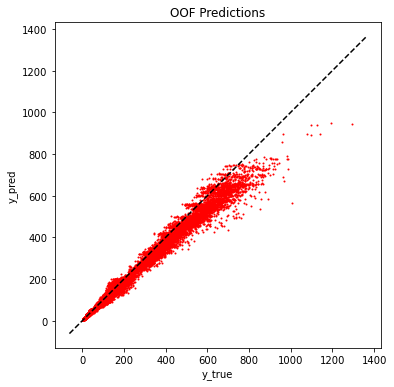

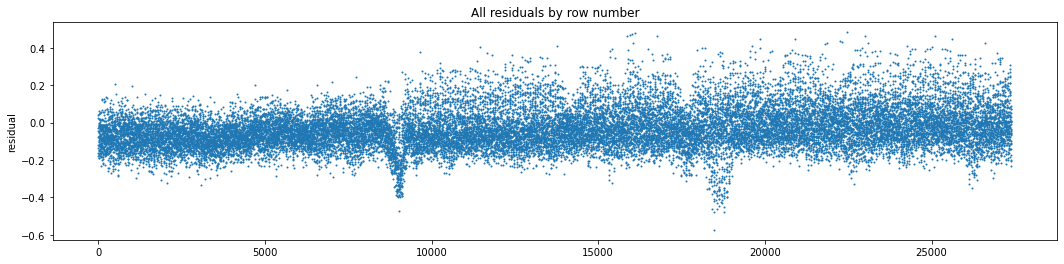

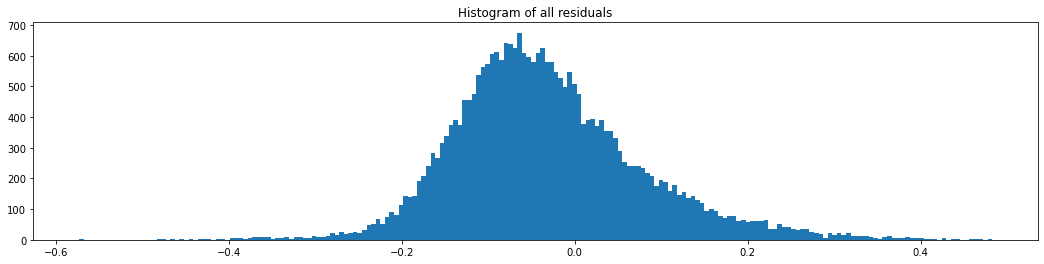

Standard deviation of log residuals: 0.109
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 11.98230| SMAPE AC: 11.38270
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}
Fold 2 | 00:00 | SMAPE BC: 12.21080| SMAPE AC: 13.84950


In [292]:
_, xgb_model = train_model('xgb', best_params, True)

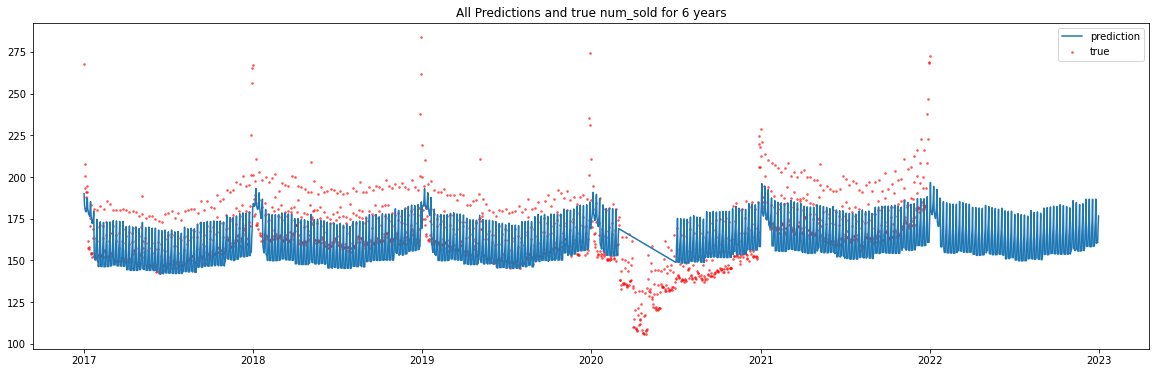

In [293]:
predict_plot(xgb_model)

### Submission

In [294]:
# make predictions
y_hat = np.exp(xgb_model.predict(test_eng[features]))
y_hat

array([114.36102 , 122.27813 ,  19.432741, ..., 114.734085, 649.18207 ,
       585.11456 ], dtype=float32)

In [295]:
sub = pd.DataFrame(zip(test_eng.id,y_hat), columns=['id','num_sold'])
sub

,id,num_sold
0,136950,114.361023
1,136951,122.278130
2,136952,19.432741
3,136953,107.563675
4,136954,95.052383
...,...,...
27370,164320,673.367920
27371,164321,721.723145
27372,164322,114.734085
27373,164323,649.182068


In [296]:
sub.to_csv('submissions/sub20.csv', index=False)

SMAPE score using XGB is ~12. Sales are very much higher with ensemble models than linear regression. Suspecting a regime shift in private LB which tested predictions against data from April ~ December.

## LightGBM Regressor

In [267]:
best_params = run_model('lgbm', 50)

[I 2023-07-19 20:14:44,477] A new study created in memory with name: no-name-5d6c0313-d5c4-46c2-9f33-414f645260c5


Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0005384559956411983. Current value: lambda_l2=0.0005384559956411983
[LightGBM] [Warning] feature_fraction is set=0.6606705760199395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6606705760199395
[LightGBM] [Warning] bagging_fraction is set=0.6645876846865028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6645876846865028
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0005384559956411983. Current value: lambda_l2=0.0005384559956411983
[LightGBM] [Warning] feature_fraction is set=0.6606705760199395, colsample_bytre

[I 2023-07-19 20:14:46,375] Trial 0 finished with value: 35.15723333333333 and parameters: {'learning_rate': 0.014412264090460966, 'n_estimators': 200, 'num_leaves': 29, 'max_depth': 6, 'min_child_samples': 92, 'feature_fraction': 0.6606705760199395, 'bagging_fraction': 0.6645876846865028, 'bagging_freq': 9, 'lambda': 0.0005384559956411983, 'alpha': 0.17050423513027774}. Best is trial 0 with value: 35.15723333333333.


Fold 2 | 00:00 | SMAPE BC: 35.82940| SMAPE AC: 36.42650
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=8.566624921664262e-05. Current value: lambda_l2=8.566624921664262e-05
[LightGBM] [Warning] feature_fraction is set=0.9097798228918221, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9097798228918221
[LightGBM] [Warning] bagging_fraction is set=0.6126920887739906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6126920887739906
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=8.566624921664262e-05. Current value: lambda_l2=8.566624921664262e-05
[LightGBM] [Warning] fea

[90]	valid_0's l1: 0.260058	valid_0's SMAPE: 7.0169
[91]	valid_0's l1: 0.257322	valid_0's SMAPE: 6.9494
[92]	valid_0's l1: 0.254685	valid_0's SMAPE: 6.8842
[93]	valid_0's l1: 0.25202	valid_0's SMAPE: 6.8191
[94]	valid_0's l1: 0.249457	valid_0's SMAPE: 6.7565
[95]	valid_0's l1: 0.246885	valid_0's SMAPE: 6.6927
[96]	valid_0's l1: 0.244953	valid_0's SMAPE: 6.6498
[97]	valid_0's l1: 0.243147	valid_0's SMAPE: 6.6102
[98]	valid_0's l1: 0.240666	valid_0's SMAPE: 6.5485
[99]	valid_0's l1: 0.238346	valid_0's SMAPE: 6.4907
[100]	valid_0's l1: 0.236044	valid_0's SMAPE: 6.4333
Fold 0 | 00:01 | SMAPE BC: 22.84230| SMAPE AC: 23.09650
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 27.38610| SMAPE AC: 27.33160
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:14:48,267] Trial 1 finished with value: 25.467033333333333 and parameters: {'learning_rate': 0.01969003910670515, 'n_estimators': 300, 'num_leaves': 27, 'max_depth': 5, 'min_child_samples': 64, 'feature_fraction': 0.9097798228918221, 'bagging_fraction': 0.6126920887739906, 'bagging_freq': 4, 'lambda': 8.566624921664262e-05, 'alpha': 8.916353756906215}. Best is trial 1 with value: 25.467033333333333.


Fold 2 | 00:00 | SMAPE BC: 26.17270| SMAPE AC: 27.22790
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003104125693435216. Current value: lambda_l2=0.0003104125693435216
[LightGBM] [Warning] feature_fraction is set=0.9225721651068822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9225721651068822
[LightGBM] [Warning] bagging_fraction is set=0.9299570922781765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9299570922781765
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0003104125693435216. Current value: lambda_l2=0.0003104125693435216
[LightGBM] [Warning] fea

[88]	valid_0's l1: 0.366359	valid_0's SMAPE: 9.5523
[89]	valid_0's l1: 0.362412	valid_0's SMAPE: 9.4628
[90]	valid_0's l1: 0.358507	valid_0's SMAPE: 9.374
[91]	valid_0's l1: 0.354565	valid_0's SMAPE: 9.2849
[92]	valid_0's l1: 0.350775	valid_0's SMAPE: 9.1982
[93]	valid_0's l1: 0.346991	valid_0's SMAPE: 9.1111
[94]	valid_0's l1: 0.343112	valid_0's SMAPE: 9.0225
[95]	valid_0's l1: 0.33959	valid_0's SMAPE: 8.9434
[96]	valid_0's l1: 0.336901	valid_0's SMAPE: 8.8841
[97]	valid_0's l1: 0.334332	valid_0's SMAPE: 8.8278
[98]	valid_0's l1: 0.330857	valid_0's SMAPE: 8.7487
[99]	valid_0's l1: 0.327275	valid_0's SMAPE: 8.6659
[100]	valid_0's l1: 0.323711	valid_0's SMAPE: 8.5833
Fold 0 | 00:01 | SMAPE BC: 30.27880| SMAPE AC: 30.42610
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 34.61260| SMAPE AC: 34.44780
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:14:50,260] Trial 2 finished with value: 32.84023333333334 and parameters: {'learning_rate': 0.013581754390763283, 'n_estimators': 200, 'num_leaves': 72, 'max_depth': 8, 'min_child_samples': 93, 'feature_fraction': 0.9225721651068822, 'bagging_fraction': 0.9299570922781765, 'bagging_freq': 5, 'lambda': 0.0003104125693435216, 'alpha': 0.07974679999339292}. Best is trial 1 with value: 25.467033333333333.


Fold 2 | 00:00 | SMAPE BC: 33.62930| SMAPE AC: 34.73660
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.7182282408106405e-05. Current value: lambda_l2=4.7182282408106405e-05
[LightGBM] [Warning] feature_fraction is set=0.7688526296464281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7688526296464281
[LightGBM] [Warning] bagging_fraction is set=0.8126072515765547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8126072515765547
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.7182282408106405e-05. Current value: lambda_l2=4.7182282408106405e-05
[LightGBM] [Warning]

[I 2023-07-19 20:14:52,252] Trial 3 finished with value: 14.274266666666668 and parameters: {'learning_rate': 0.0434738701603638, 'n_estimators': 200, 'num_leaves': 61, 'max_depth': 10, 'min_child_samples': 76, 'feature_fraction': 0.7688526296464281, 'bagging_fraction': 0.8126072515765547, 'bagging_freq': 8, 'lambda': 4.7182282408106405e-05, 'alpha': 1.462937805117933}. Best is trial 3 with value: 14.274266666666668.


Fold 2 | 00:00 | SMAPE BC: 15.48910| SMAPE AC: 16.17600
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.007741031398622778. Current value: lambda_l2=0.007741031398622778
[LightGBM] [Warning] feature_fraction is set=0.9346703703548107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9346703703548107
[LightGBM] [Warning] bagging_fraction is set=0.8240434935069835, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8240434935069835
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.007741031398622778. Current value: lambda_l2=0.007741031398622778
[LightGBM] [Warning] feature

[I 2023-07-19 20:14:53,818] Trial 4 finished with value: 21.117833333333333 and parameters: {'learning_rate': 0.036051467309790655, 'n_estimators': 500, 'num_leaves': 92, 'max_depth': 3, 'min_child_samples': 51, 'feature_fraction': 0.9346703703548107, 'bagging_fraction': 0.8240434935069835, 'bagging_freq': 8, 'lambda': 0.007741031398622778, 'alpha': 0.0009476384429442646}. Best is trial 3 with value: 14.274266666666668.


Fold 2 | 00:00 | SMAPE BC: 22.00500| SMAPE AC: 22.96950
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03836929587591652. Current value: lambda_l2=0.03836929587591652
[LightGBM] [Warning] feature_fraction is set=0.74558908481662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.74558908481662
[LightGBM] [Warning] bagging_fraction is set=0.9396192996907411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9396192996907411
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03836929587591652. Current value: lambda_l2=0.03836929587591652
[LightGBM] [Warning] feature_fractio

[I 2023-07-19 20:14:55,365] Trial 5 finished with value: 42.92933333333334 and parameters: {'learning_rate': 0.01026458421407341, 'n_estimators': 300, 'num_leaves': 12, 'max_depth': 6, 'min_child_samples': 46, 'feature_fraction': 0.74558908481662, 'bagging_fraction': 0.9396192996907411, 'bagging_freq': 6, 'lambda': 0.03836929587591652, 'alpha': 3.331155606666915e-05}. Best is trial 3 with value: 14.274266666666668.


Fold 2 | 00:00 | SMAPE BC: 43.30310| SMAPE AC: 44.00190
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03657207393155789. Current value: lambda_l2=0.03657207393155789
[LightGBM] [Warning] feature_fraction is set=0.9005751354222347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9005751354222347
[LightGBM] [Warning] bagging_fraction is set=0.7272781298075688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7272781298075688
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03657207393155789. Current value: lambda_l2=0.03657207393155789
[LightGBM] [Warning] feature_fra

[I 2023-07-19 20:14:57,024] Trial 6 finished with value: 12.367633333333332 and parameters: {'learning_rate': 0.09136487760704926, 'n_estimators': 200, 'num_leaves': 18, 'max_depth': 8, 'min_child_samples': 8, 'feature_fraction': 0.9005751354222347, 'bagging_fraction': 0.7272781298075688, 'bagging_freq': 7, 'lambda': 0.03657207393155789, 'alpha': 1.0774547514805502e-05}. Best is trial 6 with value: 12.367633333333332.


Fold 2 | 00:00 | SMAPE BC: 13.34490| SMAPE AC: 14.15940
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.4078625661126791. Current value: lambda_l2=1.4078625661126791
[LightGBM] [Warning] feature_fraction is set=0.6690356889939464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6690356889939464
[LightGBM] [Warning] bagging_fraction is set=0.6001559489039737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6001559489039737
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.4078625661126791. Current value: lambda_l2=1.4078625661126791
[LightGBM] [Warning] feature_fractio

[96]	valid_0's l1: 0.397426	valid_0's SMAPE: 10.2154
[97]	valid_0's l1: 0.394947	valid_0's SMAPE: 10.1639
[98]	valid_0's l1: 0.392256	valid_0's SMAPE: 10.1048
[99]	valid_0's l1: 0.388819	valid_0's SMAPE: 10.0275
[100]	valid_0's l1: 0.386158	valid_0's SMAPE: 9.971
Fold 0 | 00:01 | SMAPE BC: 35.74520| SMAPE AC: 35.90830
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 41.88500| SMAPE AC: 41.44080
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:14:58,892] Trial 7 finished with value: 39.3953 and parameters: {'learning_rate': 0.011838068341694092, 'n_estimators': 300, 'num_leaves': 57, 'max_depth': 9, 'min_child_samples': 87, 'feature_fraction': 0.6690356889939464, 'bagging_fraction': 0.6001559489039737, 'bagging_freq': 3, 'lambda': 1.4078625661126791, 'alpha': 0.11317972353586324}. Best is trial 6 with value: 12.367633333333332.


Fold 2 | 00:00 | SMAPE BC: 40.55570| SMAPE AC: 41.08990
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0009798934571202532. Current value: lambda_l2=0.0009798934571202532
[LightGBM] [Warning] feature_fraction is set=0.8412675570832906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8412675570832906
[LightGBM] [Warning] bagging_fraction is set=0.865836499348698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.865836499348698
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0009798934571202532. Current value: lambda_l2=0.0009798934571202532
[LightGBM] [Warning] featu

[73]	valid_0's l1: 0.520487	valid_0's SMAPE: 12.9043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.517094	valid_0's SMAPE: 12.8324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.512991	valid_0's SMAPE: 12.744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.509427	valid_0's SMAPE: 12.6681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.50586	valid_0's SMAPE: 12.592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.502206	valid_0's SMAPE: 12.5145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.498636	valid_0's SMAPE: 12.4387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 0.494728	valid_0's SMAPE: 12.3549
[LightGBM] [Warning] No further splits with positive g

[I 2023-07-19 20:15:00,617] Trial 8 finished with value: 41.493766666666666 and parameters: {'learning_rate': 0.010298391137224274, 'n_estimators': 300, 'num_leaves': 76, 'max_depth': 5, 'min_child_samples': 75, 'feature_fraction': 0.8412675570832906, 'bagging_fraction': 0.865836499348698, 'bagging_freq': 6, 'lambda': 0.0009798934571202532, 'alpha': 0.0005010999782102164}. Best is trial 6 with value: 12.367633333333332.


Fold 2 | 00:00 | SMAPE BC: 41.97630| SMAPE AC: 42.85380
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=6.229170983675058. Current value: lambda_l2=6.229170983675058
[LightGBM] [Warning] feature_fraction is set=0.6865707489798238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6865707489798238
[LightGBM] [Warning] bagging_fraction is set=0.7701265595077931, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7701265595077931
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=6.229170983675058. Current value: lambda_l2=6.229170983675058
[LightGBM] [Warning] feature_fraction is

[I 2023-07-19 20:15:02,332] Trial 9 finished with value: 12.5255 and parameters: {'learning_rate': 0.117685201908975, 'n_estimators': 100, 'num_leaves': 12, 'max_depth': 7, 'min_child_samples': 45, 'feature_fraction': 0.6865707489798238, 'bagging_fraction': 0.7701265595077931, 'bagging_freq': 9, 'lambda': 6.229170983675058, 'alpha': 8.078684102485862e-05}. Best is trial 6 with value: 12.367633333333332.


Fold 2 | 00:00 | SMAPE BC: 13.29250| SMAPE AC: 13.77200
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1541314639313464. Current value: lambda_l2=0.1541314639313464
[LightGBM] [Warning] feature_fraction is set=0.9867757974707125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9867757974707125
[LightGBM] [Warning] bagging_fraction is set=0.7247363741928257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7247363741928257
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1541314639313464. Current value: lambda_l2=0.1541314639313464
[LightGBM] [Warning] feature_fractio

[I 2023-07-19 20:15:04,256] Trial 10 finished with value: 12.063933333333333 and parameters: {'learning_rate': 0.1653914328437456, 'n_estimators': 500, 'num_leaves': 36, 'max_depth': 10, 'min_child_samples': 4, 'feature_fraction': 0.9867757974707125, 'bagging_fraction': 0.7247363741928257, 'bagging_freq': 7, 'lambda': 0.1541314639313464, 'alpha': 1.329003419706238e-05}. Best is trial 10 with value: 12.063933333333333.


Fold 2 | 00:00 | SMAPE BC: 13.23740| SMAPE AC: 14.50080
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.11981942012785561. Current value: lambda_l2=0.11981942012785561
[LightGBM] [Warning] feature_fraction is set=0.9910857012913259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910857012913259
[LightGBM] [Warning] bagging_fraction is set=0.7244871621082571, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7244871621082571
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.11981942012785561. Current value: lambda_l2=0.11981942012785561
[LightGBM] [Warning] feature_fra

[I 2023-07-19 20:15:06,179] Trial 11 finished with value: 12.045166666666667 and parameters: {'learning_rate': 0.1625930238616921, 'n_estimators': 500, 'num_leaves': 36, 'max_depth': 10, 'min_child_samples': 4, 'feature_fraction': 0.9910857012913259, 'bagging_fraction': 0.7244871621082571, 'bagging_freq': 7, 'lambda': 0.11981942012785561, 'alpha': 1.2263175523753399e-05}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.01150| SMAPE AC: 14.04090
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3845307742145784. Current value: lambda_l2=0.3845307742145784
[LightGBM] [Warning] feature_fraction is set=0.9822719995348971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822719995348971
[LightGBM] [Warning] bagging_fraction is set=0.7214567368701035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7214567368701035
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3845307742145784. Current value: lambda_l2=0.3845307742145784
[LightGBM] [Warning] feature_fractio

[I 2023-07-19 20:15:07,974] Trial 12 finished with value: 12.208166666666669 and parameters: {'learning_rate': 0.19730776425147845, 'n_estimators': 500, 'num_leaves': 46, 'max_depth': 10, 'min_child_samples': 2, 'feature_fraction': 0.9822719995348971, 'bagging_fraction': 0.7214567368701035, 'bagging_freq': 1, 'lambda': 0.3845307742145784, 'alpha': 1.4712907367187716e-05}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.47800| SMAPE AC: 14.54140
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.2512672640329924. Current value: lambda_l2=0.2512672640329924
[LightGBM] [Warning] feature_fraction is set=0.9950669127136259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9950669127136259
[LightGBM] [Warning] bagging_fraction is set=0.6939710400339676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6939710400339676
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.2512672640329924. Current value: lambda_l2=0.2512672640329924
[LightGBM] [Warning] feature_fract

[I 2023-07-19 20:15:09,783] Trial 13 finished with value: 12.397133333333334 and parameters: {'learning_rate': 0.1985709645723951, 'n_estimators': 500, 'num_leaves': 40, 'max_depth': 10, 'min_child_samples': 23, 'feature_fraction': 0.9950669127136259, 'bagging_fraction': 0.6939710400339676, 'bagging_freq': 10, 'lambda': 0.2512672640329924, 'alpha': 0.00024097339344061872}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.44580| SMAPE AC: 14.08630
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.14315867996181533. Current value: lambda_l2=0.14315867996181533
[LightGBM] [Warning] feature_fraction is set=0.9998638801096301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9998638801096301
[LightGBM] [Warning] bagging_fraction is set=0.7481347898432715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7481347898432715
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.14315867996181533. Current value: lambda_l2=0.14315867996181533
[LightGBM] [Warning] feature_fra

[I 2023-07-19 20:15:11,603] Trial 14 finished with value: 12.071733333333333 and parameters: {'learning_rate': 0.09186276607372945, 'n_estimators': 400, 'num_leaves': 39, 'max_depth': 9, 'min_child_samples': 23, 'feature_fraction': 0.9998638801096301, 'bagging_fraction': 0.7481347898432715, 'bagging_freq': 7, 'lambda': 0.14315867996181533, 'alpha': 0.0027884686537915948}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.37920| SMAPE AC: 14.76380
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.057366007852934. Current value: lambda_l2=9.057366007852934
[LightGBM] [Warning] feature_fraction is set=0.8470387783533869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8470387783533869
[LightGBM] [Warning] bagging_fraction is set=0.6686232675794265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6686232675794265
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.057366007852934. Current value: lambda_l2=9.057366007852934
[LightGBM] [Warning] feature_fraction is

[I 2023-07-19 20:15:13,529] Trial 15 finished with value: 12.701766666666666 and parameters: {'learning_rate': 0.1272101401938874, 'n_estimators': 400, 'num_leaves': 32, 'max_depth': 9, 'min_child_samples': 18, 'feature_fraction': 0.8470387783533869, 'bagging_fraction': 0.6686232675794265, 'bagging_freq': 4, 'lambda': 9.057366007852934, 'alpha': 0.00011638938520908432}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.80220| SMAPE AC: 14.08620
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0031453287779059317. Current value: lambda_l2=0.0031453287779059317
[LightGBM] [Warning] feature_fraction is set=0.9592504403369103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9592504403369103
[LightGBM] [Warning] bagging_fraction is set=0.7794977087819811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7794977087819811
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.0031453287779059317. Current value: lambda_l2=0.0031453287779059317
[LightGBM] [Warning] fea

[I 2023-07-19 20:15:15,621] Trial 16 finished with value: 12.271499999999998 and parameters: {'learning_rate': 0.07077972494629253, 'n_estimators': 400, 'num_leaves': 48, 'max_depth': 8, 'min_child_samples': 32, 'feature_fraction': 0.9592504403369103, 'bagging_fraction': 0.7794977087819811, 'bagging_freq': 5, 'lambda': 0.0031453287779059317, 'alpha': 6.187499958203174e-05}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 13.15410| SMAPE AC: 14.17980
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0194932114537051e-05. Current value: lambda_l2=1.0194932114537051e-05
[LightGBM] [Warning] feature_fraction is set=0.9545113939719394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9545113939719394
[LightGBM] [Warning] bagging_fraction is set=0.9927929191465459, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9927929191465459
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0194932114537051e-05. Current value: lambda_l2=1.0194932114537051e-05
[LightGBM] [Warning]

[I 2023-07-19 20:15:17,229] Trial 17 finished with value: 13.120199999999999 and parameters: {'learning_rate': 0.15094313438545767, 'n_estimators': 500, 'num_leaves': 65, 'max_depth': 3, 'min_child_samples': 11, 'feature_fraction': 0.9545113939719394, 'bagging_fraction': 0.9927929191465459, 'bagging_freq': 7, 'lambda': 1.0194932114537051e-05, 'alpha': 1.1167719649589247e-05}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 14.13180| SMAPE AC: 15.54720
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03714784440958564. Current value: lambda_l2=0.03714784440958564
[LightGBM] [Warning] feature_fraction is set=0.8909169427349909, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8909169427349909
[LightGBM] [Warning] bagging_fraction is set=0.7090834881806716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7090834881806716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.03714784440958564. Current value: lambda_l2=0.03714784440958564
[LightGBM] [Warning] feature_fra

[I 2023-07-19 20:15:19,154] Trial 18 finished with value: 12.994399999999999 and parameters: {'learning_rate': 0.060943540716949525, 'n_estimators': 400, 'num_leaves': 26, 'max_depth': 10, 'min_child_samples': 34, 'feature_fraction': 0.8909169427349909, 'bagging_fraction': 0.7090834881806716, 'bagging_freq': 2, 'lambda': 0.03714784440958564, 'alpha': 0.0036891358279976076}. Best is trial 11 with value: 12.045166666666667.


Fold 2 | 00:00 | SMAPE BC: 14.10210| SMAPE AC: 15.13230
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.1093611741104732. Current value: lambda_l2=1.1093611741104732
[LightGBM] [Warning] feature_fraction is set=0.8603978875263543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603978875263543
[LightGBM] [Warning] bagging_fraction is set=0.7643122020793003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7643122020793003
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.1093611741104732. Current value: lambda_l2=1.1093611741104732
[LightGBM] [Warning] feature_fractio

[I 2023-07-19 20:15:21,316] Trial 19 finished with value: 11.646766666666666 and parameters: {'learning_rate': 0.14699802585575952, 'n_estimators': 500, 'num_leaves': 51, 'max_depth': 7, 'min_child_samples': 3, 'feature_fraction': 0.8603978875263543, 'bagging_fraction': 0.7643122020793003, 'bagging_freq': 8, 'lambda': 1.1093611741104732, 'alpha': 0.0002511844692212812}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.44590| SMAPE AC: 13.21450
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.1779625951696395. Current value: lambda_l2=1.1779625951696395
[LightGBM] [Warning] feature_fraction is set=0.8527887550521286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8527887550521286
[LightGBM] [Warning] bagging_fraction is set=0.7638371882717205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7638371882717205
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.1779625951696395. Current value: lambda_l2=1.1779625951696395
[LightGBM] [Warning] feature_fract

Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.44200| SMAPE AC: 12.53480
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:23,078] Trial 20 finished with value: 11.989433333333332 and parameters: {'learning_rate': 0.11806225568764502, 'n_estimators': 400, 'num_leaves': 87, 'max_depth': 4, 'min_child_samples': 33, 'feature_fraction': 0.8527887550521286, 'bagging_fraction': 0.7638371882717205, 'bagging_freq': 10, 'lambda': 1.1779625951696395, 'alpha': 0.00024759329396908475}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.24280| SMAPE AC: 13.95720
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.5510617883161606. Current value: lambda_l2=1.5510617883161606
[LightGBM] [Warning] feature_fraction is set=0.8603305280057393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8603305280057393
[LightGBM] [Warning] bagging_fraction is set=0.7717432584857831, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7717432584857831
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.5510617883161606. Current value: lambda_l2=1.5510617883161606
[LightGBM] [Warning] feature_fract

[69]	valid_0's l1: 0.092354	valid_0's SMAPE: 2.4996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.092224	valid_0's SMAPE: 2.4968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.0917018	valid_0's SMAPE: 2.4808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.091566	valid_0's SMAPE: 2.4774
[73]	valid_0's l1: 0.091378	valid_0's SMAPE: 2.4703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0913457	valid_0's SMAPE: 2.4692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0911482	valid_0's SMAPE: 2.4644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0908232	valid_0's SMAPE: 2.4541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0908058	valid_0's SMAPE: 2.4526
[L

[I 2023-07-19 20:15:24,943] Trial 21 finished with value: 11.974433333333332 and parameters: {'learning_rate': 0.12474127115998113, 'n_estimators': 400, 'num_leaves': 95, 'max_depth': 5, 'min_child_samples': 17, 'feature_fraction': 0.8603305280057393, 'bagging_fraction': 0.7717432584857831, 'bagging_freq': 10, 'lambda': 1.5510617883161606, 'alpha': 0.00021864902915584965}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.77560| SMAPE AC: 13.65460
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.4991977700365033. Current value: lambda_l2=1.4991977700365033
[LightGBM] [Warning] feature_fraction is set=0.8506376974528598, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8506376974528598
[LightGBM] [Warning] bagging_fraction is set=0.774887690828529, subsample=1.0 will be ignored. Current value: bagging_fraction=0.774887690828529
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.4991977700365033. Current value: lambda_l2=1.4991977700365033
[LightGBM] [Warning] feature_fractio

Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.39790| SMAPE AC: 13.40720
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:26,503] Trial 22 finished with value: 12.333133333333334 and parameters: {'learning_rate': 0.11746496678964626, 'n_estimators': 400, 'num_leaves': 100, 'max_depth': 4, 'min_child_samples': 36, 'feature_fraction': 0.8506376974528598, 'bagging_fraction': 0.774887690828529, 'bagging_freq': 10, 'lambda': 1.4991977700365033, 'alpha': 0.000378298744212249}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.30690| SMAPE AC: 14.26320
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.3454513085964057. Current value: lambda_l2=1.3454513085964057
[LightGBM] [Warning] feature_fraction is set=0.8099306828800936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8099306828800936
[LightGBM] [Warning] bagging_fraction is set=0.8348554191021446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8348554191021446
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.3454513085964057. Current value: lambda_l2=1.3454513085964057
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 0.096574	valid_0's SMAPE: 2.6633
[94]	valid_0's l1: 0.0963211	valid_0's SMAPE: 2.6564
[95]	valid_0's l1: 0.0958968	valid_0's SMAPE: 2.644
[96]	valid_0's l1: 0.0957307	valid_0's SMAPE: 2.6405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's l1: 0.0953052	valid_0's SMAPE: 2.628
[98]	valid_0's l1: 0.0951884	valid_0's SMAPE: 2.6255
[99]	valid_0's l1: 0.0948661	valid_0's SMAPE: 2.6075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 0.0946715	valid_0's SMAPE: 2.6033
Fold 0 | 00:00 | SMAPE BC: 9.42850| SMAPE AC: 8.67650
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.00290| SMAPE AC: 13.09790
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:28,173] Trial 23 finished with value: 12.32 and parameters: {'learning_rate': 0.09563825274041225, 'n_estimators': 400, 'num_leaves': 86, 'max_depth': 4, 'min_child_samples': 15, 'feature_fraction': 0.8099306828800936, 'bagging_fraction': 0.8348554191021446, 'bagging_freq': 9, 'lambda': 1.3454513085964057, 'alpha': 0.0012706527268614438}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.52860| SMAPE AC: 14.66760
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.9231381915328676. Current value: lambda_l2=2.9231381915328676
[LightGBM] [Warning] feature_fraction is set=0.8794675245916355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794675245916355
[LightGBM] [Warning] bagging_fraction is set=0.7882244027464392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7882244027464392
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.9231381915328676. Current value: lambda_l2=2.9231381915328676
[LightGBM] [Warning] feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.0905837	valid_0's SMAPE: 2.4464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.0905535	valid_0's SMAPE: 2.4462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.0904277	valid_0's SMAPE: 2.4432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0903601	valid_0's SMAPE: 2.4417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0903008	valid_0's SMAPE: 2.4406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0902974	valid_0's SMAPE: 2.437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0902597	valid_0's SMAPE: 2.4357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0901935	v

[I 2023-07-19 20:15:29,990] Trial 24 finished with value: 11.6895 and parameters: {'learning_rate': 0.13535346899925757, 'n_estimators': 400, 'num_leaves': 89, 'max_depth': 5, 'min_child_samples': 27, 'feature_fraction': 0.8794675245916355, 'bagging_fraction': 0.7882244027464392, 'bagging_freq': 10, 'lambda': 2.9231381915328676, 'alpha': 0.00031439573488801527}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.62030| SMAPE AC: 13.64900
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.517507663581032. Current value: lambda_l2=4.517507663581032
[LightGBM] [Warning] feature_fraction is set=0.8826386892708269, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8826386892708269
[LightGBM] [Warning] bagging_fraction is set=0.7889484261023557, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7889484261023557
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.517507663581032. Current value: lambda_l2=4.517507663581032
[LightGBM] [Warning] feature_fraction is

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	valid_0's l1: 0.0898357	valid_0's SMAPE: 2.4359
[85]	valid_0's l1: 0.0897301	valid_0's SMAPE: 2.432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's l1: 0.0895139	valid_0's SMAPE: 2.4247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	valid_0's l1: 0.089425	valid_0's SMAPE: 2.4229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	valid_0's l1: 0.0894027	valid_0's SMAPE: 2.4224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's l1: 0.0893296	valid_0's SMAPE: 2.4194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 0.0893601	valid_0's SMAPE: 2.4205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 0.0893863	valid_0's SMAPE: 2.4211
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-19 20:15:31,761] Trial 25 finished with value: 11.747866666666667 and parameters: {'learning_rate': 0.144443988716431, 'n_estimators': 500, 'num_leaves': 100, 'max_depth': 5, 'min_child_samples': 25, 'feature_fraction': 0.8826386892708269, 'bagging_fraction': 0.7889484261023557, 'bagging_freq': 9, 'lambda': 4.517507663581032, 'alpha': 0.00014162972911255638}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.43780| SMAPE AC: 13.70220
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=5.0738573798502395. Current value: lambda_l2=5.0738573798502395
[LightGBM] [Warning] feature_fraction is set=0.8926264377064232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8926264377064232
[LightGBM] [Warning] bagging_fraction is set=0.8008964499858104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8008964499858104
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=5.0738573798502395. Current value: lambda_l2=5.0738573798502395
[LightGBM] [Warning] feature_fractio

[71]	valid_0's l1: 0.0890231	valid_0's SMAPE: 2.3968
[72]	valid_0's l1: 0.0889229	valid_0's SMAPE: 2.3946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0888553	valid_0's SMAPE: 2.3922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0887719	valid_0's SMAPE: 2.3892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0886859	valid_0's SMAPE: 2.3858
[76]	valid_0's l1: 0.0887667	valid_0's SMAPE: 2.3873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0887454	valid_0's SMAPE: 2.3868
[78]	valid_0's l1: 0.0886989	valid_0's SMAPE: 2.3847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.0886115	valid_0's SMAPE: 2.3823
[80]	valid_0's l1: 0.0886029	valid_0's SMAPE: 2.3818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0

[I 2023-07-19 20:15:33,649] Trial 26 finished with value: 11.828666666666665 and parameters: {'learning_rate': 0.1565361439412266, 'n_estimators': 500, 'num_leaves': 79, 'max_depth': 7, 'min_child_samples': 27, 'feature_fraction': 0.8926264377064232, 'bagging_fraction': 0.8008964499858104, 'bagging_freq': 8, 'lambda': 5.0738573798502395, 'alpha': 0.011335102362410157}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.97360| SMAPE AC: 13.82430
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.553841260287019. Current value: lambda_l2=4.553841260287019
[LightGBM] [Warning] feature_fraction is set=0.8109439362910978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8109439362910978
[LightGBM] [Warning] bagging_fraction is set=0.8243942627276208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8243942627276208
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=4.553841260287019. Current value: lambda_l2=4.553841260287019
[LightGBM] [Warning] feature_fraction is

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.102333	valid_0's SMAPE: 2.7985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.101923	valid_0's SMAPE: 2.7845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.101351	valid_0's SMAPE: 2.7679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.100673	valid_0's SMAPE: 2.7437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.10034	valid_0's SMAPE: 2.7348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 0.0997054	valid_0's SMAPE: 2.7135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0.0994269	valid_0's SMAPE: 2.7056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[82]	valid_0's l1: 0.0989967	valid_

[I 2023-07-19 20:15:35,472] Trial 27 finished with value: 12.682966666666667 and parameters: {'learning_rate': 0.06750543467578082, 'n_estimators': 500, 'num_leaves': 69, 'max_depth': 6, 'min_child_samples': 51, 'feature_fraction': 0.8109439362910978, 'bagging_fraction': 0.8243942627276208, 'bagging_freq': 9, 'lambda': 4.553841260287019, 'alpha': 4.082424918982547e-05}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.72920| SMAPE AC: 14.54270
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.5940918344090719. Current value: lambda_l2=0.5940918344090719
[LightGBM] [Warning] feature_fraction is set=0.8795653086094546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8795653086094546
[LightGBM] [Warning] bagging_fraction is set=0.8529758600735966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8529758600735966
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.5940918344090719. Current value: lambda_l2=0.5940918344090719
[LightGBM] [Warning] feature_fractio

[75]	valid_0's l1: 0.0900724	valid_0's SMAPE: 2.4294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0900278	valid_0's SMAPE: 2.4285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0897104	valid_0's SMAPE: 2.4196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.0897168	valid_0's SMAPE: 2.4199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.0897005	valid_0's SMAPE: 2.4189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 0.0897135	valid_0's SMAPE: 2.4194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0.0896178	valid_0's SMAPE: 2.4147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[82]	valid_0's l1: 0.0896394	valid_0's SMAPE: 2.4152
[LightGBM] [Warning] No further splits with positiv

[I 2023-07-19 20:15:37,268] Trial 28 finished with value: 12.1085 and parameters: {'learning_rate': 0.18937163314199265, 'n_estimators': 500, 'num_leaves': 84, 'max_depth': 5, 'min_child_samples': 42, 'feature_fraction': 0.8795653086094546, 'bagging_fraction': 0.8529758600735966, 'bagging_freq': 8, 'lambda': 0.5940918344090719, 'alpha': 0.00012815628365900146}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.81180| SMAPE AC: 13.66980
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.0732814034934934. Current value: lambda_l2=3.0732814034934934
[LightGBM] [Warning] feature_fraction is set=0.9290641637466428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9290641637466428
[LightGBM] [Warning] bagging_fraction is set=0.8054993737047103, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8054993737047103
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.0732814034934934. Current value: lambda_l2=3.0732814034934934
[LightGBM] [Warning] feature_fractio

Fold 1 | 00:00 | SMAPE BC: 14.46740| SMAPE AC: 12.99560
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:39,198] Trial 29 finished with value: 12.087133333333334 and parameters: {'learning_rate': 0.15367518736973124, 'n_estimators': 100, 'num_leaves': 52, 'max_depth': 7, 'min_child_samples': 25, 'feature_fraction': 0.9290641637466428, 'bagging_fraction': 0.8054993737047103, 'bagging_freq': 9, 'lambda': 3.0732814034934934, 'alpha': 0.0006407429316996088}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.07670| SMAPE AC: 14.08010
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=8.067832087900573. Current value: lambda_l2=8.067832087900573
[LightGBM] [Warning] feature_fraction is set=0.8768524078752888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8768524078752888
[LightGBM] [Warning] bagging_fraction is set=0.7947617060545039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7947617060545039
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=8.067832087900573. Current value: lambda_l2=8.067832087900573
[LightGBM] [Warning] feature_fraction is

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.0987632	valid_0's SMAPE: 2.6867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.0983064	valid_0's SMAPE: 2.6699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's l1: 0.0979129	valid_0's SMAPE: 2.6581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.0972452	valid_0's SMAPE: 2.6394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.0968258	valid_0's SMAPE: 2.6257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.096581	valid_0's SMAPE: 2.6188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0960482	valid_0's SMAPE: 2.6021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0956966	v

[I 2023-07-19 20:15:41,054] Trial 30 finished with value: 12.1616 and parameters: {'learning_rate': 0.08126923700368283, 'n_estimators': 500, 'num_leaves': 100, 'max_depth': 6, 'min_child_samples': 60, 'feature_fraction': 0.8768524078752888, 'bagging_fraction': 0.7947617060545039, 'bagging_freq': 9, 'lambda': 8.067832087900573, 'alpha': 0.0013073715241134227}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.08770| SMAPE AC: 14.22010
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.0779348379539937. Current value: lambda_l2=3.0779348379539937
[LightGBM] [Warning] feature_fraction is set=0.8980825783033755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8980825783033755
[LightGBM] [Warning] bagging_fraction is set=0.7407411764420194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7407411764420194
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.0779348379539937. Current value: lambda_l2=3.0779348379539937
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0886916	valid_0's SMAPE: 2.3816
[75]	valid_0's l1: 0.0886505	valid_0's SMAPE: 2.3807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0886202	valid_0's SMAPE: 2.38
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0886059	valid_0's SMAPE: 2.3788
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.0885629	valid_0's SMAPE: 2.3771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.0885023	valid_0's SMAPE: 2.3755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 0.0884565	valid_0's SMAPE: 2.3743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0.0884438	valid_0's SMAPE: 2.374
[LightGBM] [Warning] No further splits with positive g

[I 2023-07-19 20:15:42,920] Trial 31 finished with value: 11.749266666666665 and parameters: {'learning_rate': 0.1417406901654128, 'n_estimators': 500, 'num_leaves': 79, 'max_depth': 7, 'min_child_samples': 26, 'feature_fraction': 0.8980825783033755, 'bagging_fraction': 0.7407411764420194, 'bagging_freq': 8, 'lambda': 3.0779348379539937, 'alpha': 0.014890798966043783}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.42490| SMAPE AC: 13.37640
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.6356846510247535. Current value: lambda_l2=0.6356846510247535
[LightGBM] [Warning] feature_fraction is set=0.915717990923368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.915717990923368
[LightGBM] [Warning] bagging_fraction is set=0.7404550168974576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7404550168974576
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.6356846510247535. Current value: lambda_l2=0.6356846510247535
[LightGBM] [Warning] feature_fraction 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0901457	valid_0's SMAPE: 2.426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0900571	valid_0's SMAPE: 2.4239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0898932	valid_0's SMAPE: 2.4196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0897787	valid_0's SMAPE: 2.417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0896626	valid_0's SMAPE: 2.4135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0895356	valid_0's SMAPE: 2.41
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.0895226	valid_0's SMAPE: 2.4095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.089296	valid

[I 2023-07-19 20:15:44,803] Trial 32 finished with value: 11.967233333333333 and parameters: {'learning_rate': 0.10551729155740418, 'n_estimators': 500, 'num_leaves': 81, 'max_depth': 7, 'min_child_samples': 39, 'feature_fraction': 0.915717990923368, 'bagging_fraction': 0.7404550168974576, 'bagging_freq': 8, 'lambda': 0.6356846510247535, 'alpha': 0.010634174175311121}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.82720| SMAPE AC: 13.49190
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8234008402497777. Current value: lambda_l2=2.8234008402497777
[LightGBM] [Warning] feature_fraction is set=0.8743399413793286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8743399413793286
[LightGBM] [Warning] bagging_fraction is set=0.7534303438724661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7534303438724661
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8234008402497777. Current value: lambda_l2=2.8234008402497777
[LightGBM] [Warning] feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.0915305	valid_0's SMAPE: 2.4589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's l1: 0.0914246	valid_0's SMAPE: 2.457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's l1: 0.091351	valid_0's SMAPE: 2.4554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's l1: 0.0911988	valid_0's SMAPE: 2.4517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.090967	valid_0's SMAPE: 2.4447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.0908834	valid_0's SMAPE: 2.4426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.0906881	valid_0's SMAPE: 2.4384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.0904987	val

[I 2023-07-19 20:15:46,756] Trial 33 finished with value: 11.825933333333333 and parameters: {'learning_rate': 0.13556141323798387, 'n_estimators': 400, 'num_leaves': 92, 'max_depth': 6, 'min_child_samples': 12, 'feature_fraction': 0.8743399413793286, 'bagging_fraction': 0.7534303438724661, 'bagging_freq': 10, 'lambda': 2.8234008402497777, 'alpha': 0.036306072389956784}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.63970| SMAPE AC: 13.59850
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.704914743036499. Current value: lambda_l2=2.704914743036499
[LightGBM] [Warning] feature_fraction is set=0.9183321302070708, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9183321302070708
[LightGBM] [Warning] bagging_fraction is set=0.6838068312884733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6838068312884733
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.704914743036499. Current value: lambda_l2=2.704914743036499
[LightGBM] [Warning] feature_fraction is

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 0.0906282	valid_0's SMAPE: 2.4554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 0.0904378	valid_0's SMAPE: 2.4498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's l1: 0.0904083	valid_0's SMAPE: 2.4485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 0.0905872	valid_0's SMAPE: 2.4532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's l1: 0.0905611	valid_0's SMAPE: 2.4529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's l1: 0.0905043	valid_0's SMAPE: 2.4513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's l1: 0.090399	valid_0's SMAPE: 2.449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's l1: 0.0903453	va

[I 2023-07-19 20:15:48,465] Trial 34 finished with value: 11.739400000000002 and parameters: {'learning_rate': 0.1388436239864006, 'n_estimators': 300, 'num_leaves': 73, 'max_depth': 5, 'min_child_samples': 57, 'feature_fraction': 0.9183321302070708, 'bagging_fraction': 0.6838068312884733, 'bagging_freq': 9, 'lambda': 2.704914743036499, 'alpha': 0.0044519454253435925}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.50050| SMAPE AC: 13.55470
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.683641446797921. Current value: lambda_l2=0.683641446797921
[LightGBM] [Warning] feature_fraction is set=0.9119101570059192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9119101570059192
[LightGBM] [Warning] bagging_fraction is set=0.6455400645145898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6455400645145898
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.683641446797921. Current value: lambda_l2=0.683641446797921
[LightGBM] [Warning] feature_fraction is

[86]	valid_0's l1: 0.0938857	valid_0's SMAPE: 2.5459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	valid_0's l1: 0.0936999	valid_0's SMAPE: 2.5417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	valid_0's l1: 0.0935705	valid_0's SMAPE: 2.5391
[89]	valid_0's l1: 0.0934021	valid_0's SMAPE: 2.534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 0.0931764	valid_0's SMAPE: 2.5262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 0.0932078	valid_0's SMAPE: 2.5263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's l1: 0.0931865	valid_0's SMAPE: 2.5258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 0.093159	valid_0's SMAPE: 2.5233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's l1: 0.0931441	valid_0's SMAPE: 2.5229


[I 2023-07-19 20:15:50,215] Trial 35 finished with value: 12.391266666666667 and parameters: {'learning_rate': 0.1020410157328941, 'n_estimators': 300, 'num_leaves': 71, 'max_depth': 5, 'min_child_samples': 58, 'feature_fraction': 0.9119101570059192, 'bagging_fraction': 0.6455400645145898, 'bagging_freq': 9, 'lambda': 0.683641446797921, 'alpha': 0.002836521677802555}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 13.46780| SMAPE AC: 14.76270
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.302918204523645. Current value: lambda_l2=2.302918204523645
[LightGBM] [Warning] feature_fraction is set=0.8249250414367046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8249250414367046
[LightGBM] [Warning] bagging_fraction is set=0.6319437386571846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6319437386571846
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.302918204523645. Current value: lambda_l2=2.302918204523645
[LightGBM] [Warning] feature_fraction 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.0933007	valid_0's SMAPE: 2.5579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.0932269	valid_0's SMAPE: 2.5566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.0931494	valid_0's SMAPE: 2.5541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0931965	valid_0's SMAPE: 2.5554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0931362	valid_0's SMAPE: 2.5543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0930261	valid_0's SMAPE: 2.5516
[75]	valid_0's l1: 0.0928655	valid_0's SMAPE: 2.5472
[76]	valid_0's l1: 0.0927653	valid_0's SMAPE: 2.5375
[77]	valid_0's l1: 0.0925945	valid_0's SMAPE: 2.5316
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2023-07-19 20:15:51,786] Trial 36 finished with value: 11.6494 and parameters: {'learning_rate': 0.17224412434448358, 'n_estimators': 300, 'num_leaves': 94, 'max_depth': 4, 'min_child_samples': 54, 'feature_fraction': 0.8249250414367046, 'bagging_fraction': 0.6319437386571846, 'bagging_freq': 10, 'lambda': 2.302918204523645, 'alpha': 0.0006239427992476187}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.10160| SMAPE AC: 12.97560
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.3600028027092685. Current value: lambda_l2=2.3600028027092685
[LightGBM] [Warning] feature_fraction is set=0.8246935004281435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8246935004281435
[LightGBM] [Warning] bagging_fraction is set=0.6345055791633422, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6345055791633422
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.3600028027092685. Current value: lambda_l2=2.3600028027092685
[LightGBM] [Warning] feature_fract

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.0949763	valid_0's SMAPE: 2.6056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's l1: 0.0948716	valid_0's SMAPE: 2.603
[69]	valid_0's l1: 0.0940252	valid_0's SMAPE: 2.5697
[70]	valid_0's l1: 0.0935673	valid_0's SMAPE: 2.554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.0934099	valid_0's SMAPE: 2.5496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0932731	valid_0's SMAPE: 2.5463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0932586	valid_0's SMAPE: 2.5463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0931051	valid_0's SMAPE: 2.5428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0930202	valid_0's SMAPE: 2.5403


[I 2023-07-19 20:15:53,350] Trial 37 finished with value: 11.910566666666668 and parameters: {'learning_rate': 0.17053690138575145, 'n_estimators': 300, 'num_leaves': 58, 'max_depth': 4, 'min_child_samples': 68, 'feature_fraction': 0.8246935004281435, 'bagging_fraction': 0.6345055791633422, 'bagging_freq': 10, 'lambda': 2.3600028027092685, 'alpha': 0.0005975440285980539}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.32240| SMAPE AC: 13.22910
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3411964507138143. Current value: lambda_l2=0.3411964507138143
[LightGBM] [Warning] feature_fraction is set=0.769825942582459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.769825942582459
[LightGBM] [Warning] bagging_fraction is set=0.685326149704883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.685326149704883
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3411964507138143. Current value: lambda_l2=0.3411964507138143
[LightGBM] [Warning] feature_fraction 

Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.15280| SMAPE AC: 12.78690
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:54,841] Trial 38 finished with value: 11.9437 and parameters: {'learning_rate': 0.19879544430897622, 'n_estimators': 200, 'num_leaves': 92, 'max_depth': 3, 'min_child_samples': 57, 'feature_fraction': 0.769825942582459, 'bagging_fraction': 0.685326149704883, 'bagging_freq': 10, 'lambda': 0.3411964507138143, 'alpha': 0.0015803435841796542}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.30230| SMAPE AC: 12.90210
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.841771964687046. Current value: lambda_l2=9.841771964687046
[LightGBM] [Warning] feature_fraction is set=0.8298671458623026, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8298671458623026
[LightGBM] [Warning] bagging_fraction is set=0.6296325656126216, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6296325656126216
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=9.841771964687046. Current value: lambda_l2=9.841771964687046
[LightGBM] [Warning] feature_fraction is

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.270949	valid_0's SMAPE: 7.2343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.268203	valid_0's SMAPE: 7.1737
[65]	valid_0's l1: 0.264586	valid_0's SMAPE: 7.0813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.260366	valid_0's SMAPE: 6.9759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.256669	valid_0's SMAPE: 6.884
[68]	valid_0's l1: 0.253286	valid_0's SMAPE: 6.7956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's l1: 0.249031	valid_0's SMAPE: 6.6876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's l1: 0.244953	valid_0's SMAPE: 6.5834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's l1: 0.241167	valid_0's SMAPE: 6.4891
[LightGB

[I 2023-07-19 20:15:56,377] Trial 39 finished with value: 20.48496666666667 and parameters: {'learning_rate': 0.029489120130130334, 'n_estimators': 300, 'num_leaves': 63, 'max_depth': 4, 'min_child_samples': 72, 'feature_fraction': 0.8298671458623026, 'bagging_fraction': 0.6296325656126216, 'bagging_freq': 8, 'lambda': 9.841771964687046, 'alpha': 0.003984727190795257}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 21.53060| SMAPE AC: 22.60260
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.8444942953381134. Current value: lambda_l2=0.8444942953381134
[LightGBM] [Warning] feature_fraction is set=0.7781814411330144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781814411330144
[LightGBM] [Warning] bagging_fraction is set=0.6699223709682184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6699223709682184
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.8444942953381134. Current value: lambda_l2=0.8444942953381134
[LightGBM] [Warning] feature_fract

Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.64790| SMAPE AC: 14.16210
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:15:57,876] Trial 40 finished with value: 13.01763333333333 and parameters: {'learning_rate': 0.11159740461259615, 'n_estimators': 300, 'num_leaves': 75, 'max_depth': 3, 'min_child_samples': 87, 'feature_fraction': 0.7781814411330144, 'bagging_fraction': 0.6699223709682184, 'bagging_freq': 10, 'lambda': 0.8444942953381134, 'alpha': 0.00058917287195294}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 14.18610| SMAPE AC: 15.55430
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.605724091134404. Current value: lambda_l2=3.605724091134404
[LightGBM] [Warning] feature_fraction is set=0.8616001980120704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8616001980120704
[LightGBM] [Warning] bagging_fraction is set=0.6086588301758139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6086588301758139
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=3.605724091134404. Current value: lambda_l2=3.605724091134404
[LightGBM] [Warning] feature_fraction is

[52]	valid_0's l1: 0.0956266	valid_0's SMAPE: 2.5828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.0953007	valid_0's SMAPE: 2.5753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.0949	valid_0's SMAPE: 2.5659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.0944585	valid_0's SMAPE: 2.5529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.0942648	valid_0's SMAPE: 2.548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's l1: 0.0940096	valid_0's SMAPE: 2.5407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's l1: 0.0936838	valid_0's SMAPE: 2.5321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's l1: 0.0934883	valid_0's SMAPE: 2.5281
[LightGBM] [Warning] No further splits with positive ga

[I 2023-07-19 20:15:59,525] Trial 41 finished with value: 11.810599999999999 and parameters: {'learning_rate': 0.1403498627148829, 'n_estimators': 300, 'num_leaves': 96, 'max_depth': 5, 'min_child_samples': 48, 'feature_fraction': 0.8616001980120704, 'bagging_fraction': 0.6086588301758139, 'bagging_freq': 9, 'lambda': 3.605724091134404, 'alpha': 0.00013008650882887664}. Best is trial 19 with value: 11.646766666666666.


Fold 2 | 00:00 | SMAPE BC: 12.48880| SMAPE AC: 13.32710
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.7279193534303958. Current value: lambda_l2=1.7279193534303958
[LightGBM] [Warning] feature_fraction is set=0.9313678258021693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9313678258021693
[LightGBM] [Warning] bagging_fraction is set=0.6909616131434296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6909616131434296
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.7279193534303958. Current value: lambda_l2=1.7279193534303958
[LightGBM] [Warning] feature_fractio

[74]	valid_0's l1: 0.0906435	valid_0's SMAPE: 2.4265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0905299	valid_0's SMAPE: 2.4239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0903635	valid_0's SMAPE: 2.419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.0903358	valid_0's SMAPE: 2.4177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.0903884	valid_0's SMAPE: 2.4185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's l1: 0.0902692	valid_0's SMAPE: 2.4156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's l1: 0.0902064	valid_0's SMAPE: 2.414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's l1: 0.0901333	valid_0's SMAPE: 2.4123
[LightGBM] [Warning] No further splits with positive 

[I 2023-07-19 20:16:01,321] Trial 42 finished with value: 11.646600000000001 and parameters: {'learning_rate': 0.13409716484074713, 'n_estimators': 200, 'num_leaves': 87, 'max_depth': 6, 'min_child_samples': 65, 'feature_fraction': 0.9313678258021693, 'bagging_fraction': 0.6909616131434296, 'bagging_freq': 9, 'lambda': 1.7279193534303958, 'alpha': 0.00027496873565197846}. Best is trial 42 with value: 11.646600000000001.


Fold 2 | 00:00 | SMAPE BC: 12.49710| SMAPE AC: 13.29820
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.044178834751798. Current value: lambda_l2=2.044178834751798
[LightGBM] [Warning] feature_fraction is set=0.9302794227547057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9302794227547057
[LightGBM] [Warning] bagging_fraction is set=0.6534368073867589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6534368073867589
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.044178834751798. Current value: lambda_l2=2.044178834751798
[LightGBM] [Warning] feature_fraction is

[49]	valid_0's l1: 0.0918833	valid_0's SMAPE: 2.4635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 0.0918245	valid_0's SMAPE: 2.4616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.0917167	valid_0's SMAPE: 2.4579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.0914785	valid_0's SMAPE: 2.4509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.0914151	valid_0's SMAPE: 2.4486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.0913913	valid_0's SMAPE: 2.4482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.0912665	valid_0's SMAPE: 2.4449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's l1: 0.0912448	valid_0's SMAPE: 2.4447
[LightGBM] [Warning] No further splits with positiv

[I 2023-07-19 20:16:03,039] Trial 43 finished with value: 11.873399999999998 and parameters: {'learning_rate': 0.17587588993586153, 'n_estimators': 200, 'num_leaves': 89, 'max_depth': 6, 'min_child_samples': 61, 'feature_fraction': 0.9302794227547057, 'bagging_fraction': 0.6534368073867589, 'bagging_freq': 9, 'lambda': 2.044178834751798, 'alpha': 0.00038764307204696325}. Best is trial 42 with value: 11.646600000000001.


Fold 2 | 00:00 | SMAPE BC: 12.39830| SMAPE AC: 13.17420
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9052910377277888. Current value: lambda_l2=0.9052910377277888
[LightGBM] [Warning] feature_fraction is set=0.9111329985873694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9111329985873694
[LightGBM] [Warning] bagging_fraction is set=0.6894288644916138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6894288644916138
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9052910377277888. Current value: lambda_l2=0.9052910377277888
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's l1: 0.0914969	valid_0's SMAPE: 2.4676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	valid_0's l1: 0.0914209	valid_0's SMAPE: 2.4642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 0.0913395	valid_0's SMAPE: 2.4629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.0912251	valid_0's SMAPE: 2.4595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.0912455	valid_0's SMAPE: 2.4605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.0912216	valid_0's SMAPE: 2.4596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.0910511	valid_0's SMAPE: 2.4551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's l1: 0.0909719	

[I 2023-07-19 20:16:04,796] Trial 44 finished with value: 11.519966666666667 and parameters: {'learning_rate': 0.16871517827426763, 'n_estimators': 200, 'num_leaves': 83, 'max_depth': 6, 'min_child_samples': 54, 'feature_fraction': 0.9111329985873694, 'bagging_fraction': 0.6894288644916138, 'bagging_freq': 8, 'lambda': 0.9052910377277888, 'alpha': 0.0008801254617164584}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 12.42090| SMAPE AC: 13.51700
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.08392651651300165. Current value: lambda_l2=0.08392651651300165
[LightGBM] [Warning] feature_fraction is set=0.9475162253629763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9475162253629763
[LightGBM] [Warning] bagging_fraction is set=0.7066408982681825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7066408982681825
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.08392651651300165. Current value: lambda_l2=0.08392651651300165
[LightGBM] [Warning] feature_fra

[47]	valid_0's l1: 0.0916207	valid_0's SMAPE: 2.459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's l1: 0.0915279	valid_0's SMAPE: 2.4569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	valid_0's l1: 0.0914108	valid_0's SMAPE: 2.4532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 0.0912431	valid_0's SMAPE: 2.4488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 0.0910872	valid_0's SMAPE: 2.4444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 0.0910548	valid_0's SMAPE: 2.4433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's l1: 0.0909344	valid_0's SMAPE: 2.4398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's l1: 0.0908186	valid_0's SMAPE: 2.4371
[LightGBM] [Warning] No further splits with positive

[I 2023-07-19 20:16:06,548] Trial 45 finished with value: 11.936433333333333 and parameters: {'learning_rate': 0.17279075950425557, 'n_estimators': 200, 'num_leaves': 82, 'max_depth': 6, 'min_child_samples': 65, 'feature_fraction': 0.9475162253629763, 'bagging_fraction': 0.7066408982681825, 'bagging_freq': 6, 'lambda': 0.08392651651300165, 'alpha': 0.000977300151080232}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 12.49450| SMAPE AC: 13.51270
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.4120681500957264. Current value: lambda_l2=0.4120681500957264
[LightGBM] [Warning] feature_fraction is set=0.9037540374543616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9037540374543616
[LightGBM] [Warning] bagging_fraction is set=0.6254873014544521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6254873014544521
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.4120681500957264. Current value: lambda_l2=0.4120681500957264
[LightGBM] [Warning] feature_fractio

Fold 0 | 00:01 | SMAPE BC: 8.86010| SMAPE AC: 7.88460
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 14.54590| SMAPE AC: 13.28590
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:16:08,462] Trial 46 finished with value: 12.082133333333333 and parameters: {'learning_rate': 0.12540168546139624, 'n_estimators': 100, 'num_leaves': 67, 'max_depth': 8, 'min_child_samples': 54, 'feature_fraction': 0.9037540374543616, 'bagging_fraction': 0.6254873014544521, 'bagging_freq': 8, 'lambda': 0.4120681500957264, 'alpha': 6.781900713012366e-05}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 12.84040| SMAPE AC: 13.75550
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9659175280366642. Current value: lambda_l2=0.9659175280366642
[LightGBM] [Warning] feature_fraction is set=0.8324611242359131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324611242359131
[LightGBM] [Warning] bagging_fraction is set=0.6538756470710223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6538756470710223
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9659175280366642. Current value: lambda_l2=0.9659175280366642
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[83]	valid_0's l1: 0.0888097	valid_0's SMAPE: 2.3893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	valid_0's l1: 0.0885503	valid_0's SMAPE: 2.3801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[85]	valid_0's l1: 0.0884397	valid_0's SMAPE: 2.3779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's l1: 0.0883299	valid_0's SMAPE: 2.3754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	valid_0's l1: 0.0882218	valid_0's SMAPE: 2.3729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	valid_0's l1: 0.088152	valid_0's SMAPE: 2.3709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's l1: 0.0879843	valid_0's SMAPE: 2.3656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 0.0879401	v

[I 2023-07-19 20:16:10,332] Trial 47 finished with value: 12.701933333333335 and parameters: {'learning_rate': 0.1709197123983531, 'n_estimators': 200, 'num_leaves': 89, 'max_depth': 6, 'min_child_samples': 75, 'feature_fraction': 0.8324611242359131, 'bagging_fraction': 0.6538756470710223, 'bagging_freq': 7, 'lambda': 0.9659175280366642, 'alpha': 0.00026689907801097005}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 13.69190| SMAPE AC: 14.38730
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.2250329047968769. Current value: lambda_l2=0.2250329047968769
[LightGBM] [Warning] feature_fraction is set=0.8680645220063923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8680645220063923
[LightGBM] [Warning] bagging_fraction is set=0.70041496884484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.70041496884484
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.2250329047968769. Current value: lambda_l2=0.2250329047968769
[LightGBM] [Warning] feature_fraction is

[I 2023-07-19 20:16:12,245] Trial 48 finished with value: 11.687 and parameters: {'learning_rate': 0.08393783988136815, 'n_estimators': 200, 'num_leaves': 53, 'max_depth': 8, 'min_child_samples': 46, 'feature_fraction': 0.8680645220063923, 'bagging_fraction': 0.70041496884484, 'bagging_freq': 6, 'lambda': 0.2250329047968769, 'alpha': 3.067342371567579e-05}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 12.30330| SMAPE AC: 13.03270
Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1823333936631821. Current value: lambda_l2=0.1823333936631821
[LightGBM] [Warning] feature_fraction is set=0.7963548003651668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7963548003651668
[LightGBM] [Warning] bagging_fraction is set=0.6730770825813046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6730770825813046
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1823333936631821. Current value: lambda_l2=0.1823333936631821
[LightGBM] [Warning] feature_fractio

Fold 1 | 00:00 | SMAPE BC: 16.27360| SMAPE AC: 14.48170
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}


[I 2023-07-19 20:16:14,120] Trial 49 finished with value: 12.9517 and parameters: {'learning_rate': 0.10487852739768434, 'n_estimators': 200, 'num_leaves': 46, 'max_depth': 8, 'min_child_samples': 98, 'feature_fraction': 0.7963548003651668, 'bagging_fraction': 0.6730770825813046, 'bagging_freq': 6, 'lambda': 0.1823333936631821, 'alpha': 2.9256818075992364e-05}. Best is trial 44 with value: 11.519966666666667.


Fold 2 | 00:00 | SMAPE BC: 13.74470| SMAPE AC: 13.93230
The best parameters are: {'learning_rate': 0.16871517827426763, 'n_estimators': 200, 'num_leaves': 83, 'max_depth': 6, 'min_child_samples': 54, 'feature_fraction': 0.9111329985873694, 'bagging_fraction': 0.6894288644916138, 'bagging_freq': 8, 'lambda': 0.9052910377277888, 'alpha': 0.0008801254617164584}
The best SMAPE is: 11.519966666666667


Training on these years {2017, 2018}
Validating on these years {2018, 2019}
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9052910377277888. Current value: lambda_l2=0.9052910377277888
[LightGBM] [Warning] feature_fraction is set=0.9111329985873694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9111329985873694
[LightGBM] [Warning] bagging_fraction is set=0.6894288644916138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6894288644916138
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9052910377277888. Current value: lambda_l2=0.9052910377277888
[LightGBM] [Warning] feature_fraction is set=0.9111329985873694, colsample_bytree=1.0 will b

[71]	valid_0's l1: 0.0898884	valid_0's SMAPE: 2.4192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's l1: 0.0898597	valid_0's SMAPE: 2.4188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's l1: 0.0897983	valid_0's SMAPE: 2.4171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's l1: 0.0897328	valid_0's SMAPE: 2.4155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's l1: 0.0896976	valid_0's SMAPE: 2.4146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's l1: 0.0896661	valid_0's SMAPE: 2.4136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	valid_0's l1: 0.089591	valid_0's SMAPE: 2.4122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's l1: 0.0895916	valid_0's SMAPE: 2.4123
[LightGBM] [Warning] No further splits with positive

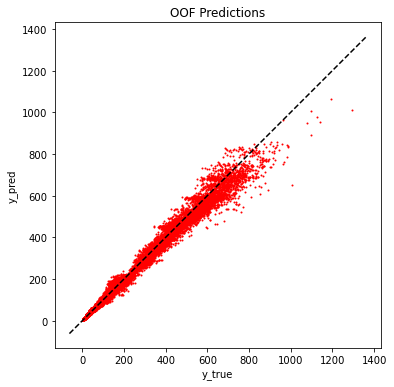

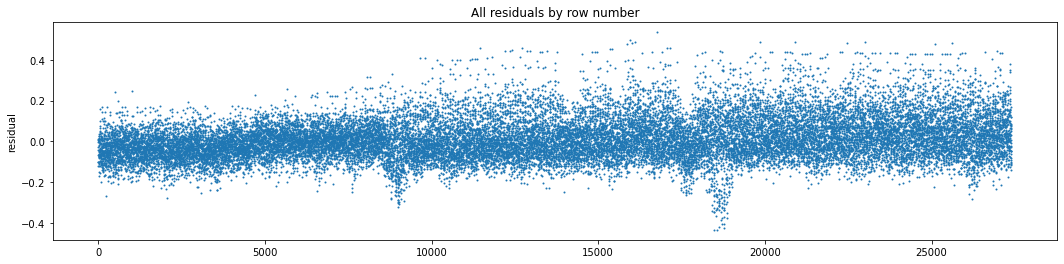

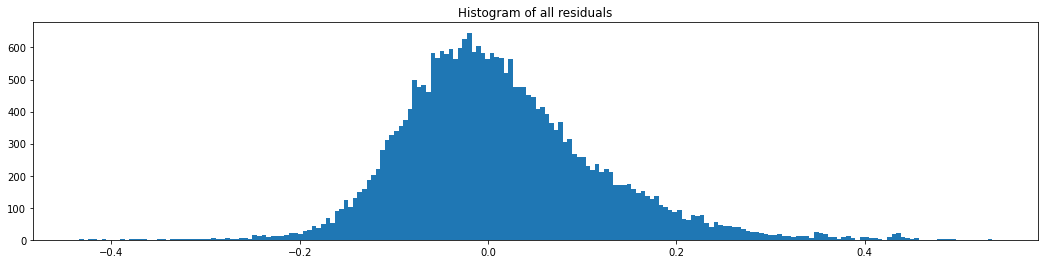

Standard deviation of log residuals: 0.103
Training on these years {2017, 2018, 2019}
Validating on these years {2019, 2020}
Fold 1 | 00:00 | SMAPE BC: 13.32910| SMAPE AC: 12.41470
Training on these years {2017, 2018, 2019, 2020}
Validating on these years {2020, 2021}
Fold 2 | 00:00 | SMAPE BC: 12.42090| SMAPE AC: 13.51700


In [268]:
_, lgb_model = train_model('lgbm', best_params, True)

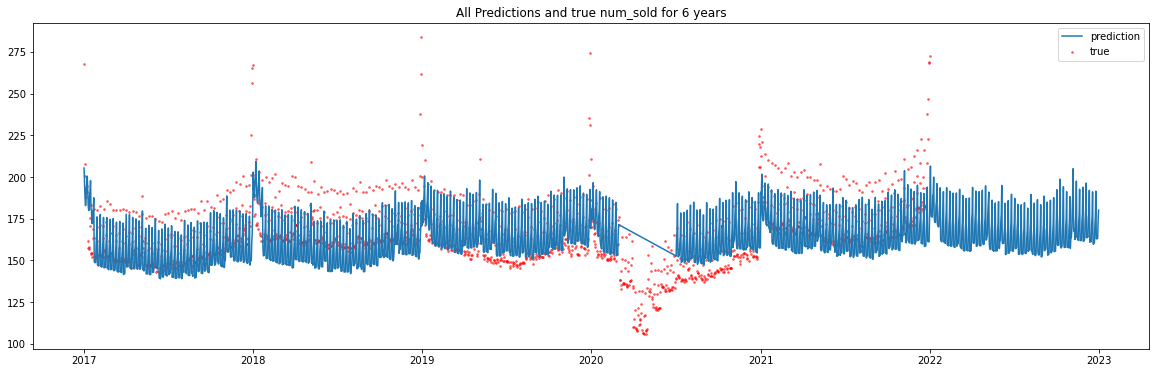

In [269]:
predict_plot(lgb_model)

### Submission

In [270]:
# make predictions
y_hat = np.exp(lgb_model.predict(test_eng[features]))
y_hat

array([ 93.60205951, 104.18104976,  15.65735271, ..., 144.18481123,
       722.72609577, 664.92251328])